In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [8]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [9]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [10]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

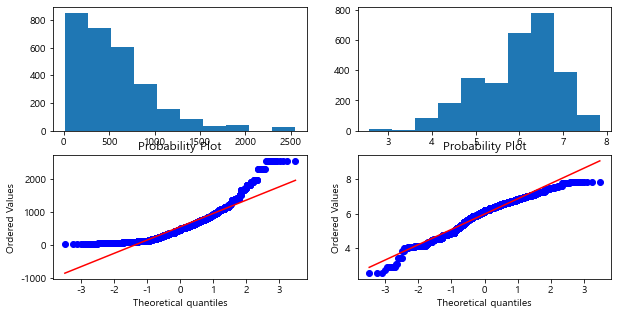

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [12]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [13]:
all_df.shape

(3877, 36)

## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [18]:
all_df.loc[ 3259, "자격유형"] = 'A'
all_df.loc[ 3454, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [27]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [29]:
# all_df['10분내지하철수'] = all_sub_df

In [30]:
# all_df.head()

In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [38]:
all_df.shape

(3877, 36)

# 라벨인코딩

In [39]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [40]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1790,657,상가,경상남도,임대상가,248.56,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
96,C2109,495,아파트,경상남도,영구임대,26.34,288,2.0,3,3138000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
97,C2109,495,아파트,경상남도,영구임대,30.48,192,2.0,3,3631000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
98,C2109,495,상가,경상남도,임대상가,31.84,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [41]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9


In [42]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [43]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [44]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [45]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [46]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [47]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [48]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

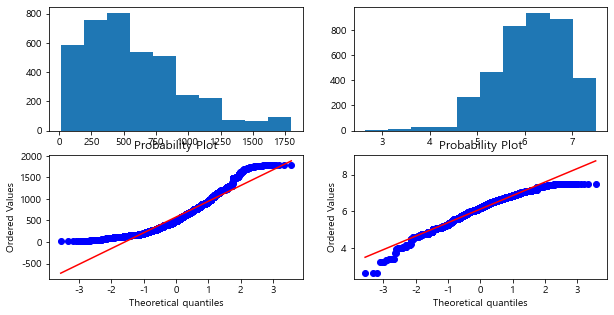

In [49]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

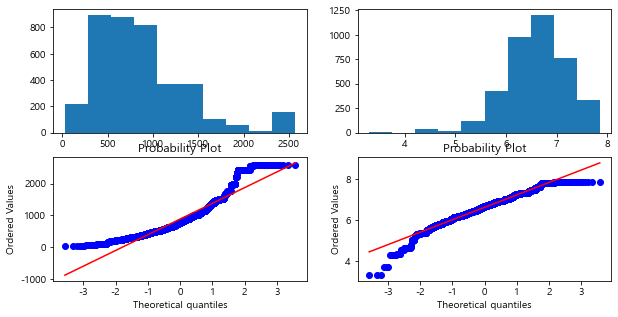

In [50]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

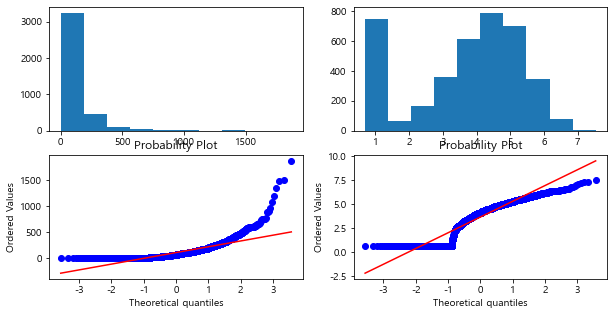

In [51]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

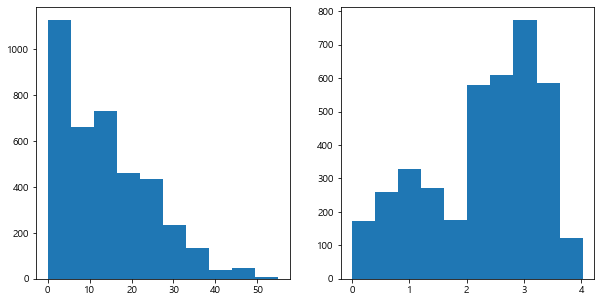

In [52]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [53]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [55]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [56]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

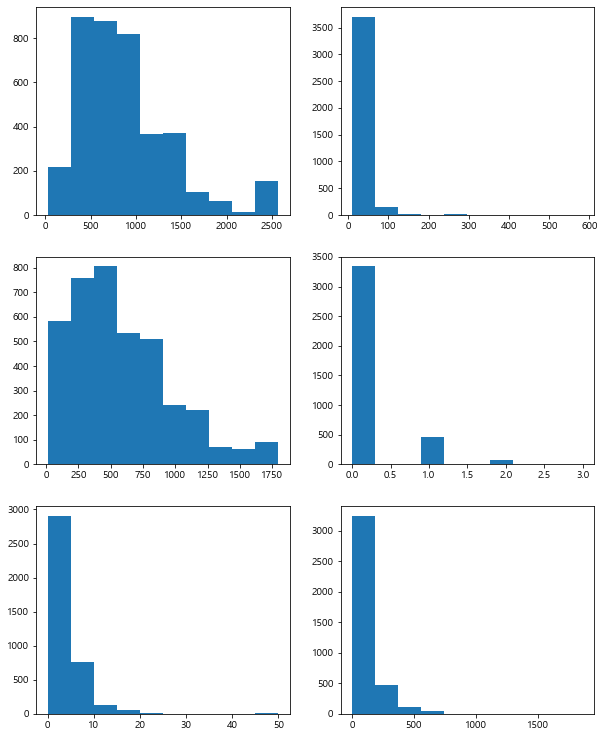

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [58]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [62]:
pd.set_option('display.min_rows',10)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [64]:
train_df.shape

(2869, 48)

In [65]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [66]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

In [67]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [81]:
from sklearn.model_selection import GridSearchCV


def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_absolute_error', cv=5)
    grid_model.fit(X, y)
    mae =-1* grid_model.best_score_
    print('{0} 5 CV 시 최적 평균 MAE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(mae, 4), grid_model.best_params_))
    return grid_model.best_estimator_


In [82]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[2000]}
xgb_reg = XGBRegressor(n_estimators=2000, learning_rate=0.05, random_state= 0,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.3178, 최적 alpha:{'n_estimators': 2000}


In [83]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[2000]}
lgbm_reg = LGBMRegressor(n_estimators=2000, learning_rate=0.05, num_leaves=4, random_state= 0,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.3312, 최적 alpha:{'n_estimators': 2000}


In [84]:
from catboost import CatBoostRegressor

catm_params = {'n_estimators':[2000]}
catm_reg = CatBoostRegressor(n_estimators=2000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")
best_catm = print_best_params(catm_reg, catm_params)

0:	learn: 0.6207227	total: 18.1ms	remaining: 36.1s
1:	learn: 0.5959458	total: 31.1ms	remaining: 31.1s
2:	learn: 0.5729096	total: 44.3ms	remaining: 29.5s
3:	learn: 0.5484992	total: 57.2ms	remaining: 28.5s
4:	learn: 0.5261314	total: 70.5ms	remaining: 28.1s
5:	learn: 0.5060966	total: 82.9ms	remaining: 27.5s
6:	learn: 0.4891205	total: 97.3ms	remaining: 27.7s
7:	learn: 0.4710136	total: 111ms	remaining: 27.6s
8:	learn: 0.4558141	total: 124ms	remaining: 27.5s
9:	learn: 0.4422050	total: 137ms	remaining: 27.3s
10:	learn: 0.4282933	total: 153ms	remaining: 27.7s
11:	learn: 0.4156440	total: 166ms	remaining: 27.5s
12:	learn: 0.4020308	total: 179ms	remaining: 27.3s
13:	learn: 0.3892974	total: 194ms	remaining: 27.6s
14:	learn: 0.3767743	total: 210ms	remaining: 27.7s
15:	learn: 0.3661462	total: 222ms	remaining: 27.5s
16:	learn: 0.3566532	total: 235ms	remaining: 27.5s
17:	learn: 0.3466676	total: 251ms	remaining: 27.6s
18:	learn: 0.3378453	total: 265ms	remaining: 27.6s
19:	learn: 0.3293695	total: 278ms	

163:	learn: 0.1006155	total: 2.38s	remaining: 26.7s
164:	learn: 0.1002828	total: 2.4s	remaining: 26.7s
165:	learn: 0.0998248	total: 2.41s	remaining: 26.6s
166:	learn: 0.0996435	total: 2.42s	remaining: 26.6s
167:	learn: 0.0994376	total: 2.44s	remaining: 26.6s
168:	learn: 0.0991876	total: 2.45s	remaining: 26.5s
169:	learn: 0.0990706	total: 2.46s	remaining: 26.5s
170:	learn: 0.0989490	total: 2.48s	remaining: 26.5s
171:	learn: 0.0988270	total: 2.49s	remaining: 26.5s
172:	learn: 0.0985992	total: 2.5s	remaining: 26.4s
173:	learn: 0.0984331	total: 2.52s	remaining: 26.4s
174:	learn: 0.0981483	total: 2.53s	remaining: 26.4s
175:	learn: 0.0979698	total: 2.54s	remaining: 26.4s
176:	learn: 0.0976819	total: 2.56s	remaining: 26.3s
177:	learn: 0.0974612	total: 2.57s	remaining: 26.3s
178:	learn: 0.0973648	total: 2.58s	remaining: 26.3s
179:	learn: 0.0971502	total: 2.6s	remaining: 26.3s
180:	learn: 0.0970764	total: 2.61s	remaining: 26.3s
181:	learn: 0.0968944	total: 2.62s	remaining: 26.2s
182:	learn: 0.0

330:	learn: 0.0730455	total: 4.74s	remaining: 23.9s
331:	learn: 0.0729897	total: 4.75s	remaining: 23.9s
332:	learn: 0.0727786	total: 4.77s	remaining: 23.9s
333:	learn: 0.0727094	total: 4.78s	remaining: 23.8s
334:	learn: 0.0725435	total: 4.79s	remaining: 23.8s
335:	learn: 0.0723260	total: 4.81s	remaining: 23.8s
336:	learn: 0.0722212	total: 4.82s	remaining: 23.8s
337:	learn: 0.0721495	total: 4.83s	remaining: 23.8s
338:	learn: 0.0719710	total: 4.85s	remaining: 23.7s
339:	learn: 0.0718131	total: 4.86s	remaining: 23.7s
340:	learn: 0.0717745	total: 4.87s	remaining: 23.7s
341:	learn: 0.0717305	total: 4.88s	remaining: 23.7s
342:	learn: 0.0716535	total: 4.9s	remaining: 23.7s
343:	learn: 0.0716152	total: 4.91s	remaining: 23.6s
344:	learn: 0.0715255	total: 4.92s	remaining: 23.6s
345:	learn: 0.0714598	total: 4.94s	remaining: 23.6s
346:	learn: 0.0714049	total: 4.95s	remaining: 23.6s
347:	learn: 0.0713691	total: 4.97s	remaining: 23.6s
348:	learn: 0.0713475	total: 4.98s	remaining: 23.6s
349:	learn: 0

489:	learn: 0.0605438	total: 7.09s	remaining: 21.9s
490:	learn: 0.0604978	total: 7.1s	remaining: 21.8s
491:	learn: 0.0604433	total: 7.12s	remaining: 21.8s
492:	learn: 0.0604267	total: 7.13s	remaining: 21.8s
493:	learn: 0.0604191	total: 7.14s	remaining: 21.8s
494:	learn: 0.0604147	total: 7.16s	remaining: 21.8s
495:	learn: 0.0603951	total: 7.17s	remaining: 21.7s
496:	learn: 0.0603355	total: 7.18s	remaining: 21.7s
497:	learn: 0.0603030	total: 7.2s	remaining: 21.7s
498:	learn: 0.0602777	total: 7.21s	remaining: 21.7s
499:	learn: 0.0602216	total: 7.22s	remaining: 21.7s
500:	learn: 0.0601295	total: 7.24s	remaining: 21.6s
501:	learn: 0.0601108	total: 7.25s	remaining: 21.6s
502:	learn: 0.0600904	total: 7.26s	remaining: 21.6s
503:	learn: 0.0600747	total: 7.28s	remaining: 21.6s
504:	learn: 0.0598950	total: 7.29s	remaining: 21.6s
505:	learn: 0.0598382	total: 7.3s	remaining: 21.6s
506:	learn: 0.0598106	total: 7.32s	remaining: 21.6s
507:	learn: 0.0597735	total: 7.34s	remaining: 21.5s
508:	learn: 0.0

656:	learn: 0.0501665	total: 9.44s	remaining: 19.3s
657:	learn: 0.0501471	total: 9.46s	remaining: 19.3s
658:	learn: 0.0501312	total: 9.47s	remaining: 19.3s
659:	learn: 0.0500893	total: 9.48s	remaining: 19.3s
660:	learn: 0.0500590	total: 9.49s	remaining: 19.2s
661:	learn: 0.0500511	total: 9.51s	remaining: 19.2s
662:	learn: 0.0500444	total: 9.52s	remaining: 19.2s
663:	learn: 0.0499990	total: 9.54s	remaining: 19.2s
664:	learn: 0.0499390	total: 9.55s	remaining: 19.2s
665:	learn: 0.0499306	total: 9.56s	remaining: 19.2s
666:	learn: 0.0499186	total: 9.57s	remaining: 19.1s
667:	learn: 0.0498305	total: 9.59s	remaining: 19.1s
668:	learn: 0.0497596	total: 9.6s	remaining: 19.1s
669:	learn: 0.0497520	total: 9.61s	remaining: 19.1s
670:	learn: 0.0497212	total: 9.63s	remaining: 19.1s
671:	learn: 0.0496738	total: 9.64s	remaining: 19.1s
672:	learn: 0.0496267	total: 9.65s	remaining: 19s
673:	learn: 0.0495694	total: 9.67s	remaining: 19s
674:	learn: 0.0495677	total: 9.68s	remaining: 19s
675:	learn: 0.04938

817:	learn: 0.0445739	total: 11.7s	remaining: 16.8s
818:	learn: 0.0445627	total: 11.7s	remaining: 16.8s
819:	learn: 0.0444960	total: 11.7s	remaining: 16.8s
820:	learn: 0.0444839	total: 11.7s	remaining: 16.8s
821:	learn: 0.0444628	total: 11.7s	remaining: 16.8s
822:	learn: 0.0444337	total: 11.7s	remaining: 16.8s
823:	learn: 0.0443813	total: 11.8s	remaining: 16.8s
824:	learn: 0.0443752	total: 11.8s	remaining: 16.8s
825:	learn: 0.0443502	total: 11.8s	remaining: 16.8s
826:	learn: 0.0442698	total: 11.8s	remaining: 16.8s
827:	learn: 0.0442522	total: 11.8s	remaining: 16.7s
828:	learn: 0.0442256	total: 11.9s	remaining: 16.7s
829:	learn: 0.0441988	total: 11.9s	remaining: 16.7s
830:	learn: 0.0441826	total: 11.9s	remaining: 16.7s
831:	learn: 0.0441518	total: 11.9s	remaining: 16.7s
832:	learn: 0.0441408	total: 11.9s	remaining: 16.7s
833:	learn: 0.0440681	total: 11.9s	remaining: 16.7s
834:	learn: 0.0440553	total: 11.9s	remaining: 16.7s
835:	learn: 0.0440530	total: 12s	remaining: 16.7s
836:	learn: 0.

984:	learn: 0.0400620	total: 14s	remaining: 14.5s
985:	learn: 0.0400379	total: 14.1s	remaining: 14.5s
986:	learn: 0.0400176	total: 14.1s	remaining: 14.4s
987:	learn: 0.0400055	total: 14.1s	remaining: 14.4s
988:	learn: 0.0399854	total: 14.1s	remaining: 14.4s
989:	learn: 0.0399710	total: 14.1s	remaining: 14.4s
990:	learn: 0.0399655	total: 14.1s	remaining: 14.4s
991:	learn: 0.0399404	total: 14.1s	remaining: 14.4s
992:	learn: 0.0399278	total: 14.2s	remaining: 14.4s
993:	learn: 0.0399255	total: 14.2s	remaining: 14.3s
994:	learn: 0.0399188	total: 14.2s	remaining: 14.3s
995:	learn: 0.0399080	total: 14.2s	remaining: 14.3s
996:	learn: 0.0398849	total: 14.2s	remaining: 14.3s
997:	learn: 0.0398238	total: 14.2s	remaining: 14.3s
998:	learn: 0.0397057	total: 14.2s	remaining: 14.3s
999:	learn: 0.0396264	total: 14.3s	remaining: 14.3s
1000:	learn: 0.0396083	total: 14.3s	remaining: 14.2s
1001:	learn: 0.0396078	total: 14.3s	remaining: 14.2s
1002:	learn: 0.0396068	total: 14.3s	remaining: 14.2s
1003:	learn

1143:	learn: 0.0362169	total: 16.2s	remaining: 12.2s
1144:	learn: 0.0361662	total: 16.3s	remaining: 12.1s
1145:	learn: 0.0361488	total: 16.3s	remaining: 12.1s
1146:	learn: 0.0360671	total: 16.3s	remaining: 12.1s
1147:	learn: 0.0360291	total: 16.3s	remaining: 12.1s
1148:	learn: 0.0360240	total: 16.3s	remaining: 12.1s
1149:	learn: 0.0360228	total: 16.3s	remaining: 12.1s
1150:	learn: 0.0359954	total: 16.3s	remaining: 12s
1151:	learn: 0.0359930	total: 16.3s	remaining: 12s
1152:	learn: 0.0359901	total: 16.4s	remaining: 12s
1153:	learn: 0.0359781	total: 16.4s	remaining: 12s
1154:	learn: 0.0359759	total: 16.4s	remaining: 12s
1155:	learn: 0.0359709	total: 16.4s	remaining: 12s
1156:	learn: 0.0359625	total: 16.4s	remaining: 12s
1157:	learn: 0.0359606	total: 16.4s	remaining: 11.9s
1158:	learn: 0.0359580	total: 16.4s	remaining: 11.9s
1159:	learn: 0.0359386	total: 16.4s	remaining: 11.9s
1160:	learn: 0.0358964	total: 16.5s	remaining: 11.9s
1161:	learn: 0.0358821	total: 16.5s	remaining: 11.9s
1162:	l

1299:	learn: 0.0339104	total: 18.3s	remaining: 9.86s
1300:	learn: 0.0338951	total: 18.3s	remaining: 9.84s
1301:	learn: 0.0338930	total: 18.3s	remaining: 9.83s
1302:	learn: 0.0338923	total: 18.3s	remaining: 9.81s
1303:	learn: 0.0338838	total: 18.4s	remaining: 9.8s
1304:	learn: 0.0338783	total: 18.4s	remaining: 9.78s
1305:	learn: 0.0338766	total: 18.4s	remaining: 9.77s
1306:	learn: 0.0338749	total: 18.4s	remaining: 9.75s
1307:	learn: 0.0338746	total: 18.4s	remaining: 9.74s
1308:	learn: 0.0338713	total: 18.4s	remaining: 9.72s
1309:	learn: 0.0338425	total: 18.4s	remaining: 9.71s
1310:	learn: 0.0338413	total: 18.4s	remaining: 9.69s
1311:	learn: 0.0338330	total: 18.5s	remaining: 9.68s
1312:	learn: 0.0338307	total: 18.5s	remaining: 9.66s
1313:	learn: 0.0338270	total: 18.5s	remaining: 9.65s
1314:	learn: 0.0338047	total: 18.5s	remaining: 9.63s
1315:	learn: 0.0337834	total: 18.5s	remaining: 9.62s
1316:	learn: 0.0337811	total: 18.5s	remaining: 9.61s
1317:	learn: 0.0337786	total: 18.5s	remaining: 

1456:	learn: 0.0321915	total: 20.4s	remaining: 7.58s
1457:	learn: 0.0321352	total: 20.4s	remaining: 7.57s
1458:	learn: 0.0321335	total: 20.4s	remaining: 7.56s
1459:	learn: 0.0321315	total: 20.4s	remaining: 7.55s
1460:	learn: 0.0321206	total: 20.4s	remaining: 7.53s
1461:	learn: 0.0321191	total: 20.4s	remaining: 7.52s
1462:	learn: 0.0321165	total: 20.4s	remaining: 7.5s
1463:	learn: 0.0321096	total: 20.5s	remaining: 7.49s
1464:	learn: 0.0320451	total: 20.5s	remaining: 7.47s
1465:	learn: 0.0319782	total: 20.5s	remaining: 7.46s
1466:	learn: 0.0319675	total: 20.5s	remaining: 7.45s
1467:	learn: 0.0319563	total: 20.5s	remaining: 7.43s
1468:	learn: 0.0318798	total: 20.5s	remaining: 7.42s
1469:	learn: 0.0318735	total: 20.5s	remaining: 7.4s
1470:	learn: 0.0318507	total: 20.5s	remaining: 7.39s
1471:	learn: 0.0318429	total: 20.6s	remaining: 7.38s
1472:	learn: 0.0317976	total: 20.6s	remaining: 7.36s
1473:	learn: 0.0317811	total: 20.6s	remaining: 7.35s
1474:	learn: 0.0317607	total: 20.6s	remaining: 7

1616:	learn: 0.0303767	total: 22.6s	remaining: 5.34s
1617:	learn: 0.0303568	total: 22.6s	remaining: 5.33s
1618:	learn: 0.0302910	total: 22.6s	remaining: 5.32s
1619:	learn: 0.0302887	total: 22.6s	remaining: 5.3s
1620:	learn: 0.0302870	total: 22.6s	remaining: 5.29s
1621:	learn: 0.0301580	total: 22.6s	remaining: 5.28s
1622:	learn: 0.0301486	total: 22.7s	remaining: 5.26s
1623:	learn: 0.0301379	total: 22.7s	remaining: 5.25s
1624:	learn: 0.0301083	total: 22.7s	remaining: 5.23s
1625:	learn: 0.0300227	total: 22.7s	remaining: 5.22s
1626:	learn: 0.0299655	total: 22.7s	remaining: 5.21s
1627:	learn: 0.0299650	total: 22.7s	remaining: 5.19s
1628:	learn: 0.0299367	total: 22.7s	remaining: 5.18s
1629:	learn: 0.0299238	total: 22.7s	remaining: 5.16s
1630:	learn: 0.0299234	total: 22.8s	remaining: 5.15s
1631:	learn: 0.0299183	total: 22.8s	remaining: 5.13s
1632:	learn: 0.0299129	total: 22.8s	remaining: 5.12s
1633:	learn: 0.0299113	total: 22.8s	remaining: 5.11s
1634:	learn: 0.0299096	total: 22.8s	remaining: 

1776:	learn: 0.0282726	total: 24.7s	remaining: 3.1s
1777:	learn: 0.0282564	total: 24.7s	remaining: 3.08s
1778:	learn: 0.0282516	total: 24.7s	remaining: 3.07s
1779:	learn: 0.0282299	total: 24.7s	remaining: 3.06s
1780:	learn: 0.0282289	total: 24.7s	remaining: 3.04s
1781:	learn: 0.0282223	total: 24.8s	remaining: 3.03s
1782:	learn: 0.0282002	total: 24.8s	remaining: 3.01s
1783:	learn: 0.0281915	total: 24.8s	remaining: 3s
1784:	learn: 0.0281860	total: 24.8s	remaining: 2.99s
1785:	learn: 0.0281719	total: 24.8s	remaining: 2.97s
1786:	learn: 0.0281711	total: 24.8s	remaining: 2.96s
1787:	learn: 0.0281706	total: 24.8s	remaining: 2.94s
1788:	learn: 0.0281675	total: 24.8s	remaining: 2.93s
1789:	learn: 0.0281362	total: 24.9s	remaining: 2.92s
1790:	learn: 0.0281331	total: 24.9s	remaining: 2.9s
1791:	learn: 0.0281295	total: 24.9s	remaining: 2.89s
1792:	learn: 0.0281264	total: 24.9s	remaining: 2.87s
1793:	learn: 0.0281052	total: 24.9s	remaining: 2.86s
1794:	learn: 0.0280765	total: 24.9s	remaining: 2.85

1939:	learn: 0.0268943	total: 26.9s	remaining: 831ms
1940:	learn: 0.0268932	total: 26.9s	remaining: 817ms
1941:	learn: 0.0268779	total: 26.9s	remaining: 803ms
1942:	learn: 0.0268763	total: 26.9s	remaining: 789ms
1943:	learn: 0.0268692	total: 26.9s	remaining: 776ms
1944:	learn: 0.0268690	total: 26.9s	remaining: 762ms
1945:	learn: 0.0268683	total: 27s	remaining: 748ms
1946:	learn: 0.0268666	total: 27s	remaining: 734ms
1947:	learn: 0.0268655	total: 27s	remaining: 720ms
1948:	learn: 0.0268653	total: 27s	remaining: 706ms
1949:	learn: 0.0268609	total: 27s	remaining: 692ms
1950:	learn: 0.0268533	total: 27s	remaining: 679ms
1951:	learn: 0.0268512	total: 27s	remaining: 665ms
1952:	learn: 0.0268256	total: 27.1s	remaining: 651ms
1953:	learn: 0.0268195	total: 27.1s	remaining: 637ms
1954:	learn: 0.0268071	total: 27.1s	remaining: 623ms
1955:	learn: 0.0268069	total: 27.1s	remaining: 609ms
1956:	learn: 0.0268054	total: 27.1s	remaining: 596ms
1957:	learn: 0.0268029	total: 27.1s	remaining: 582ms
1958:	l

101:	learn: 0.1410015	total: 1.39s	remaining: 25.9s
102:	learn: 0.1403255	total: 1.41s	remaining: 25.9s
103:	learn: 0.1392946	total: 1.42s	remaining: 25.9s
104:	learn: 0.1385893	total: 1.43s	remaining: 25.9s
105:	learn: 0.1379657	total: 1.45s	remaining: 25.9s
106:	learn: 0.1372566	total: 1.46s	remaining: 25.8s
107:	learn: 0.1366792	total: 1.47s	remaining: 25.8s
108:	learn: 0.1362189	total: 1.48s	remaining: 25.7s
109:	learn: 0.1356320	total: 1.5s	remaining: 25.7s
110:	learn: 0.1350916	total: 1.51s	remaining: 25.7s
111:	learn: 0.1346126	total: 1.52s	remaining: 25.7s
112:	learn: 0.1341516	total: 1.53s	remaining: 25.6s
113:	learn: 0.1331590	total: 1.55s	remaining: 25.6s
114:	learn: 0.1328991	total: 1.56s	remaining: 25.5s
115:	learn: 0.1322537	total: 1.57s	remaining: 25.5s
116:	learn: 0.1315878	total: 1.58s	remaining: 25.5s
117:	learn: 0.1312839	total: 1.6s	remaining: 25.5s
118:	learn: 0.1308251	total: 1.61s	remaining: 25.5s
119:	learn: 0.1303044	total: 1.63s	remaining: 25.5s
120:	learn: 0.

261:	learn: 0.0925030	total: 3.42s	remaining: 22.7s
262:	learn: 0.0924397	total: 3.43s	remaining: 22.7s
263:	learn: 0.0922167	total: 3.44s	remaining: 22.6s
264:	learn: 0.0920358	total: 3.46s	remaining: 22.6s
265:	learn: 0.0918942	total: 3.47s	remaining: 22.6s
266:	learn: 0.0915262	total: 3.48s	remaining: 22.6s
267:	learn: 0.0912198	total: 3.5s	remaining: 22.6s
268:	learn: 0.0908489	total: 3.51s	remaining: 22.6s
269:	learn: 0.0906983	total: 3.52s	remaining: 22.6s
270:	learn: 0.0906329	total: 3.53s	remaining: 22.5s
271:	learn: 0.0905851	total: 3.54s	remaining: 22.5s
272:	learn: 0.0904561	total: 3.56s	remaining: 22.5s
273:	learn: 0.0904319	total: 3.57s	remaining: 22.5s
274:	learn: 0.0903438	total: 3.58s	remaining: 22.5s
275:	learn: 0.0902945	total: 3.6s	remaining: 22.5s
276:	learn: 0.0897606	total: 3.61s	remaining: 22.5s
277:	learn: 0.0895010	total: 3.62s	remaining: 22.4s
278:	learn: 0.0892729	total: 3.63s	remaining: 22.4s
279:	learn: 0.0889995	total: 3.65s	remaining: 22.4s
280:	learn: 0.

425:	learn: 0.0696287	total: 5.63s	remaining: 20.8s
426:	learn: 0.0695719	total: 5.64s	remaining: 20.8s
427:	learn: 0.0695183	total: 5.65s	remaining: 20.8s
428:	learn: 0.0694573	total: 5.66s	remaining: 20.7s
429:	learn: 0.0693952	total: 5.68s	remaining: 20.7s
430:	learn: 0.0693549	total: 5.69s	remaining: 20.7s
431:	learn: 0.0693212	total: 5.7s	remaining: 20.7s
432:	learn: 0.0691544	total: 5.72s	remaining: 20.7s
433:	learn: 0.0690483	total: 5.73s	remaining: 20.7s
434:	learn: 0.0689874	total: 5.74s	remaining: 20.7s
435:	learn: 0.0688703	total: 5.75s	remaining: 20.6s
436:	learn: 0.0687780	total: 5.77s	remaining: 20.6s
437:	learn: 0.0685978	total: 5.78s	remaining: 20.6s
438:	learn: 0.0685339	total: 5.8s	remaining: 20.6s
439:	learn: 0.0684788	total: 5.81s	remaining: 20.6s
440:	learn: 0.0684119	total: 5.82s	remaining: 20.6s
441:	learn: 0.0682554	total: 5.84s	remaining: 20.6s
442:	learn: 0.0681850	total: 5.85s	remaining: 20.6s
443:	learn: 0.0680783	total: 5.86s	remaining: 20.5s
444:	learn: 0.

586:	learn: 0.0580704	total: 7.84s	remaining: 18.9s
587:	learn: 0.0580651	total: 7.85s	remaining: 18.9s
588:	learn: 0.0580549	total: 7.87s	remaining: 18.8s
589:	learn: 0.0579848	total: 7.88s	remaining: 18.8s
590:	learn: 0.0579657	total: 7.89s	remaining: 18.8s
591:	learn: 0.0579387	total: 7.91s	remaining: 18.8s
592:	learn: 0.0579091	total: 7.92s	remaining: 18.8s
593:	learn: 0.0578791	total: 7.93s	remaining: 18.8s
594:	learn: 0.0578645	total: 7.95s	remaining: 18.8s
595:	learn: 0.0578006	total: 7.96s	remaining: 18.7s
596:	learn: 0.0577692	total: 7.97s	remaining: 18.7s
597:	learn: 0.0576686	total: 7.98s	remaining: 18.7s
598:	learn: 0.0575328	total: 8s	remaining: 18.7s
599:	learn: 0.0575239	total: 8.01s	remaining: 18.7s
600:	learn: 0.0573269	total: 8.02s	remaining: 18.7s
601:	learn: 0.0572813	total: 8.04s	remaining: 18.7s
602:	learn: 0.0572712	total: 8.05s	remaining: 18.6s
603:	learn: 0.0572349	total: 8.06s	remaining: 18.6s
604:	learn: 0.0572073	total: 8.07s	remaining: 18.6s
605:	learn: 0.0

751:	learn: 0.0496746	total: 10s	remaining: 16.6s
752:	learn: 0.0496347	total: 10s	remaining: 16.6s
753:	learn: 0.0495700	total: 10s	remaining: 16.6s
754:	learn: 0.0495424	total: 10s	remaining: 16.6s
755:	learn: 0.0495278	total: 10.1s	remaining: 16.6s
756:	learn: 0.0495183	total: 10.1s	remaining: 16.5s
757:	learn: 0.0494100	total: 10.1s	remaining: 16.5s
758:	learn: 0.0494066	total: 10.1s	remaining: 16.5s
759:	learn: 0.0493923	total: 10.1s	remaining: 16.5s
760:	learn: 0.0493611	total: 10.1s	remaining: 16.5s
761:	learn: 0.0493229	total: 10.1s	remaining: 16.5s
762:	learn: 0.0492998	total: 10.2s	remaining: 16.5s
763:	learn: 0.0492851	total: 10.2s	remaining: 16.4s
764:	learn: 0.0492563	total: 10.2s	remaining: 16.4s
765:	learn: 0.0492092	total: 10.2s	remaining: 16.4s
766:	learn: 0.0491999	total: 10.2s	remaining: 16.4s
767:	learn: 0.0490508	total: 10.2s	remaining: 16.4s
768:	learn: 0.0488025	total: 10.2s	remaining: 16.4s
769:	learn: 0.0487255	total: 10.3s	remaining: 16.4s
770:	learn: 0.048698

920:	learn: 0.0430022	total: 12.4s	remaining: 14.5s
921:	learn: 0.0429955	total: 12.4s	remaining: 14.5s
922:	learn: 0.0429898	total: 12.4s	remaining: 14.5s
923:	learn: 0.0429706	total: 12.4s	remaining: 14.5s
924:	learn: 0.0429517	total: 12.4s	remaining: 14.5s
925:	learn: 0.0428753	total: 12.5s	remaining: 14.5s
926:	learn: 0.0428494	total: 12.5s	remaining: 14.4s
927:	learn: 0.0428343	total: 12.5s	remaining: 14.4s
928:	learn: 0.0427888	total: 12.5s	remaining: 14.4s
929:	learn: 0.0427477	total: 12.5s	remaining: 14.4s
930:	learn: 0.0427381	total: 12.5s	remaining: 14.4s
931:	learn: 0.0427262	total: 12.6s	remaining: 14.4s
932:	learn: 0.0427186	total: 12.6s	remaining: 14.4s
933:	learn: 0.0427057	total: 12.6s	remaining: 14.4s
934:	learn: 0.0427025	total: 12.6s	remaining: 14.3s
935:	learn: 0.0426891	total: 12.6s	remaining: 14.3s
936:	learn: 0.0426848	total: 12.6s	remaining: 14.3s
937:	learn: 0.0426267	total: 12.6s	remaining: 14.3s
938:	learn: 0.0425687	total: 12.7s	remaining: 14.3s
939:	learn: 

1081:	learn: 0.0387931	total: 14.6s	remaining: 12.4s
1082:	learn: 0.0387907	total: 14.6s	remaining: 12.3s
1083:	learn: 0.0387702	total: 14.6s	remaining: 12.3s
1084:	learn: 0.0387392	total: 14.6s	remaining: 12.3s
1085:	learn: 0.0387350	total: 14.6s	remaining: 12.3s
1086:	learn: 0.0387315	total: 14.6s	remaining: 12.3s
1087:	learn: 0.0387185	total: 14.6s	remaining: 12.3s
1088:	learn: 0.0387087	total: 14.7s	remaining: 12.3s
1089:	learn: 0.0385675	total: 14.7s	remaining: 12.3s
1090:	learn: 0.0385230	total: 14.7s	remaining: 12.2s
1091:	learn: 0.0385163	total: 14.7s	remaining: 12.2s
1092:	learn: 0.0385148	total: 14.7s	remaining: 12.2s
1093:	learn: 0.0385137	total: 14.7s	remaining: 12.2s
1094:	learn: 0.0384606	total: 14.7s	remaining: 12.2s
1095:	learn: 0.0384548	total: 14.7s	remaining: 12.2s
1096:	learn: 0.0383754	total: 14.8s	remaining: 12.2s
1097:	learn: 0.0383707	total: 14.8s	remaining: 12.1s
1098:	learn: 0.0382930	total: 14.8s	remaining: 12.1s
1099:	learn: 0.0382925	total: 14.8s	remaining:

1249:	learn: 0.0352158	total: 16.8s	remaining: 10.1s
1250:	learn: 0.0352085	total: 16.8s	remaining: 10.1s
1251:	learn: 0.0351706	total: 16.8s	remaining: 10s
1252:	learn: 0.0351552	total: 16.8s	remaining: 10s
1253:	learn: 0.0351544	total: 16.8s	remaining: 10s
1254:	learn: 0.0351534	total: 16.8s	remaining: 10s
1255:	learn: 0.0351508	total: 16.9s	remaining: 9.98s
1256:	learn: 0.0351235	total: 16.9s	remaining: 9.97s
1257:	learn: 0.0351147	total: 16.9s	remaining: 9.96s
1258:	learn: 0.0351094	total: 16.9s	remaining: 9.94s
1259:	learn: 0.0351064	total: 16.9s	remaining: 9.93s
1260:	learn: 0.0350894	total: 16.9s	remaining: 9.91s
1261:	learn: 0.0350892	total: 16.9s	remaining: 9.9s
1262:	learn: 0.0350847	total: 16.9s	remaining: 9.89s
1263:	learn: 0.0350657	total: 17s	remaining: 9.87s
1264:	learn: 0.0350633	total: 17s	remaining: 9.86s
1265:	learn: 0.0350581	total: 17s	remaining: 9.85s
1266:	learn: 0.0350411	total: 17s	remaining: 9.83s
1267:	learn: 0.0350210	total: 17s	remaining: 9.82s
1268:	learn:

1412:	learn: 0.0326544	total: 19s	remaining: 7.88s
1413:	learn: 0.0326532	total: 19s	remaining: 7.86s
1414:	learn: 0.0326477	total: 19s	remaining: 7.85s
1415:	learn: 0.0326444	total: 19s	remaining: 7.84s
1416:	learn: 0.0326419	total: 19s	remaining: 7.82s
1417:	learn: 0.0326168	total: 19s	remaining: 7.81s
1418:	learn: 0.0326155	total: 19s	remaining: 7.79s
1419:	learn: 0.0326134	total: 19.1s	remaining: 7.78s
1420:	learn: 0.0325996	total: 19.1s	remaining: 7.77s
1421:	learn: 0.0325940	total: 19.1s	remaining: 7.75s
1422:	learn: 0.0325824	total: 19.1s	remaining: 7.74s
1423:	learn: 0.0325819	total: 19.1s	remaining: 7.73s
1424:	learn: 0.0325628	total: 19.1s	remaining: 7.71s
1425:	learn: 0.0325584	total: 19.1s	remaining: 7.7s
1426:	learn: 0.0325520	total: 19.1s	remaining: 7.69s
1427:	learn: 0.0324914	total: 19.2s	remaining: 7.67s
1428:	learn: 0.0324879	total: 19.2s	remaining: 7.66s
1429:	learn: 0.0324773	total: 19.2s	remaining: 7.64s
1430:	learn: 0.0324746	total: 19.2s	remaining: 7.63s
1431:	le

1569:	learn: 0.0315921	total: 21s	remaining: 5.75s
1570:	learn: 0.0315911	total: 21s	remaining: 5.73s
1571:	learn: 0.0315898	total: 21s	remaining: 5.72s
1572:	learn: 0.0315875	total: 21s	remaining: 5.71s
1573:	learn: 0.0315851	total: 21s	remaining: 5.69s
1574:	learn: 0.0315807	total: 21.1s	remaining: 5.68s
1575:	learn: 0.0315775	total: 21.1s	remaining: 5.67s
1576:	learn: 0.0315760	total: 21.1s	remaining: 5.65s
1577:	learn: 0.0315400	total: 21.1s	remaining: 5.64s
1578:	learn: 0.0315371	total: 21.1s	remaining: 5.63s
1579:	learn: 0.0315342	total: 21.1s	remaining: 5.61s
1580:	learn: 0.0315326	total: 21.1s	remaining: 5.6s
1581:	learn: 0.0315320	total: 21.1s	remaining: 5.58s
1582:	learn: 0.0314979	total: 21.2s	remaining: 5.57s
1583:	learn: 0.0314911	total: 21.2s	remaining: 5.56s
1584:	learn: 0.0314891	total: 21.2s	remaining: 5.54s
1585:	learn: 0.0314885	total: 21.2s	remaining: 5.53s
1586:	learn: 0.0314816	total: 21.2s	remaining: 5.52s
1587:	learn: 0.0314775	total: 21.2s	remaining: 5.5s
1588:

1726:	learn: 0.0297053	total: 23s	remaining: 3.64s
1727:	learn: 0.0297052	total: 23s	remaining: 3.63s
1728:	learn: 0.0297039	total: 23s	remaining: 3.61s
1729:	learn: 0.0297019	total: 23.1s	remaining: 3.6s
1730:	learn: 0.0297015	total: 23.1s	remaining: 3.58s
1731:	learn: 0.0296932	total: 23.1s	remaining: 3.57s
1732:	learn: 0.0296496	total: 23.1s	remaining: 3.56s
1733:	learn: 0.0296464	total: 23.1s	remaining: 3.54s
1734:	learn: 0.0296460	total: 23.1s	remaining: 3.53s
1735:	learn: 0.0296453	total: 23.1s	remaining: 3.52s
1736:	learn: 0.0296446	total: 23.1s	remaining: 3.5s
1737:	learn: 0.0296400	total: 23.2s	remaining: 3.49s
1738:	learn: 0.0296347	total: 23.2s	remaining: 3.48s
1739:	learn: 0.0296179	total: 23.2s	remaining: 3.46s
1740:	learn: 0.0296163	total: 23.2s	remaining: 3.45s
1741:	learn: 0.0296138	total: 23.2s	remaining: 3.44s
1742:	learn: 0.0295959	total: 23.2s	remaining: 3.42s
1743:	learn: 0.0295804	total: 23.2s	remaining: 3.41s
1744:	learn: 0.0295630	total: 23.3s	remaining: 3.4s
17

1885:	learn: 0.0284078	total: 25.2s	remaining: 1.52s
1886:	learn: 0.0283803	total: 25.3s	remaining: 1.51s
1887:	learn: 0.0283720	total: 25.3s	remaining: 1.5s
1888:	learn: 0.0283407	total: 25.3s	remaining: 1.49s
1889:	learn: 0.0283381	total: 25.3s	remaining: 1.47s
1890:	learn: 0.0283314	total: 25.3s	remaining: 1.46s
1891:	learn: 0.0283264	total: 25.3s	remaining: 1.45s
1892:	learn: 0.0283246	total: 25.4s	remaining: 1.43s
1893:	learn: 0.0283189	total: 25.4s	remaining: 1.42s
1894:	learn: 0.0283100	total: 25.4s	remaining: 1.41s
1895:	learn: 0.0283087	total: 25.4s	remaining: 1.39s
1896:	learn: 0.0283018	total: 25.4s	remaining: 1.38s
1897:	learn: 0.0282896	total: 25.4s	remaining: 1.37s
1898:	learn: 0.0282873	total: 25.4s	remaining: 1.35s
1899:	learn: 0.0282857	total: 25.4s	remaining: 1.34s
1900:	learn: 0.0282701	total: 25.5s	remaining: 1.32s
1901:	learn: 0.0282641	total: 25.5s	remaining: 1.31s
1902:	learn: 0.0282629	total: 25.5s	remaining: 1.3s
1903:	learn: 0.0282613	total: 25.5s	remaining: 1

51:	learn: 0.1852266	total: 730ms	remaining: 27.4s
52:	learn: 0.1826769	total: 746ms	remaining: 27.4s
53:	learn: 0.1795659	total: 761ms	remaining: 27.4s
54:	learn: 0.1771946	total: 778ms	remaining: 27.5s
55:	learn: 0.1753048	total: 792ms	remaining: 27.5s
56:	learn: 0.1733598	total: 807ms	remaining: 27.5s
57:	learn: 0.1707713	total: 829ms	remaining: 27.7s
58:	learn: 0.1683645	total: 844ms	remaining: 27.8s
59:	learn: 0.1670523	total: 860ms	remaining: 27.8s
60:	learn: 0.1654271	total: 876ms	remaining: 27.9s
61:	learn: 0.1638753	total: 890ms	remaining: 27.8s
62:	learn: 0.1619963	total: 906ms	remaining: 27.9s
63:	learn: 0.1601845	total: 923ms	remaining: 27.9s
64:	learn: 0.1587553	total: 938ms	remaining: 27.9s
65:	learn: 0.1570744	total: 952ms	remaining: 27.9s
66:	learn: 0.1552248	total: 968ms	remaining: 27.9s
67:	learn: 0.1537438	total: 986ms	remaining: 28s
68:	learn: 0.1522303	total: 1.01s	remaining: 28.2s
69:	learn: 0.1509695	total: 1.03s	remaining: 28.3s
70:	learn: 0.1497110	total: 1.05s

220:	learn: 0.0861865	total: 3.1s	remaining: 25s
221:	learn: 0.0858709	total: 3.12s	remaining: 25s
222:	learn: 0.0856972	total: 3.13s	remaining: 25s
223:	learn: 0.0854411	total: 3.15s	remaining: 25s
224:	learn: 0.0852768	total: 3.16s	remaining: 25s
225:	learn: 0.0847337	total: 3.18s	remaining: 24.9s
226:	learn: 0.0845809	total: 3.19s	remaining: 25s
227:	learn: 0.0844314	total: 3.21s	remaining: 25s
228:	learn: 0.0842339	total: 3.23s	remaining: 25s
229:	learn: 0.0840682	total: 3.25s	remaining: 25s
230:	learn: 0.0839573	total: 3.26s	remaining: 25s
231:	learn: 0.0838000	total: 3.28s	remaining: 25s
232:	learn: 0.0835061	total: 3.3s	remaining: 25s
233:	learn: 0.0834283	total: 3.31s	remaining: 25s
234:	learn: 0.0832656	total: 3.33s	remaining: 25s
235:	learn: 0.0831661	total: 3.34s	remaining: 25s
236:	learn: 0.0830040	total: 3.36s	remaining: 25s
237:	learn: 0.0828452	total: 3.37s	remaining: 25s
238:	learn: 0.0827911	total: 3.39s	remaining: 25s
239:	learn: 0.0826783	total: 3.4s	remaining: 25s
2

389:	learn: 0.0675018	total: 5.48s	remaining: 22.6s
390:	learn: 0.0674355	total: 5.49s	remaining: 22.6s
391:	learn: 0.0673359	total: 5.51s	remaining: 22.6s
392:	learn: 0.0672850	total: 5.52s	remaining: 22.6s
393:	learn: 0.0672781	total: 5.53s	remaining: 22.6s
394:	learn: 0.0672185	total: 5.54s	remaining: 22.5s
395:	learn: 0.0670268	total: 5.56s	remaining: 22.5s
396:	learn: 0.0670100	total: 5.57s	remaining: 22.5s
397:	learn: 0.0669586	total: 5.58s	remaining: 22.5s
398:	learn: 0.0668725	total: 5.6s	remaining: 22.5s
399:	learn: 0.0668189	total: 5.61s	remaining: 22.4s
400:	learn: 0.0667229	total: 5.62s	remaining: 22.4s
401:	learn: 0.0667063	total: 5.63s	remaining: 22.4s
402:	learn: 0.0666860	total: 5.64s	remaining: 22.4s
403:	learn: 0.0666603	total: 5.66s	remaining: 22.4s
404:	learn: 0.0666159	total: 5.67s	remaining: 22.3s
405:	learn: 0.0665945	total: 5.68s	remaining: 22.3s
406:	learn: 0.0665743	total: 5.7s	remaining: 22.3s
407:	learn: 0.0665255	total: 5.71s	remaining: 22.3s
408:	learn: 0.

548:	learn: 0.0582239	total: 7.69s	remaining: 20.3s
549:	learn: 0.0582234	total: 7.7s	remaining: 20.3s
550:	learn: 0.0582096	total: 7.71s	remaining: 20.3s
551:	learn: 0.0581091	total: 7.73s	remaining: 20.3s
552:	learn: 0.0580011	total: 7.75s	remaining: 20.3s
553:	learn: 0.0579261	total: 7.76s	remaining: 20.3s
554:	learn: 0.0578940	total: 7.79s	remaining: 20.3s
555:	learn: 0.0578873	total: 7.81s	remaining: 20.3s
556:	learn: 0.0578257	total: 7.82s	remaining: 20.3s
557:	learn: 0.0578012	total: 7.84s	remaining: 20.3s
558:	learn: 0.0577804	total: 7.85s	remaining: 20.2s
559:	learn: 0.0577476	total: 7.87s	remaining: 20.2s
560:	learn: 0.0577271	total: 7.88s	remaining: 20.2s
561:	learn: 0.0575692	total: 7.89s	remaining: 20.2s
562:	learn: 0.0575207	total: 7.91s	remaining: 20.2s
563:	learn: 0.0574480	total: 7.92s	remaining: 20.2s
564:	learn: 0.0573112	total: 7.93s	remaining: 20.1s
565:	learn: 0.0572991	total: 7.95s	remaining: 20.1s
566:	learn: 0.0572148	total: 7.96s	remaining: 20.1s
567:	learn: 0

712:	learn: 0.0491967	total: 9.91s	remaining: 17.9s
713:	learn: 0.0491302	total: 9.92s	remaining: 17.9s
714:	learn: 0.0491023	total: 9.93s	remaining: 17.9s
715:	learn: 0.0489393	total: 9.95s	remaining: 17.8s
716:	learn: 0.0489150	total: 9.96s	remaining: 17.8s
717:	learn: 0.0488414	total: 9.97s	remaining: 17.8s
718:	learn: 0.0487928	total: 9.99s	remaining: 17.8s
719:	learn: 0.0487738	total: 10s	remaining: 17.8s
720:	learn: 0.0487690	total: 10s	remaining: 17.8s
721:	learn: 0.0487537	total: 10s	remaining: 17.8s
722:	learn: 0.0487412	total: 10s	remaining: 17.8s
723:	learn: 0.0487293	total: 10.1s	remaining: 17.7s
724:	learn: 0.0487086	total: 10.1s	remaining: 17.7s
725:	learn: 0.0486670	total: 10.1s	remaining: 17.7s
726:	learn: 0.0486150	total: 10.1s	remaining: 17.7s
727:	learn: 0.0485593	total: 10.1s	remaining: 17.7s
728:	learn: 0.0485502	total: 10.1s	remaining: 17.7s
729:	learn: 0.0485139	total: 10.2s	remaining: 17.7s
730:	learn: 0.0484944	total: 10.2s	remaining: 17.7s
731:	learn: 0.048481

883:	learn: 0.0444132	total: 12.3s	remaining: 15.5s
884:	learn: 0.0444109	total: 12.3s	remaining: 15.5s
885:	learn: 0.0444015	total: 12.3s	remaining: 15.5s
886:	learn: 0.0443975	total: 12.3s	remaining: 15.4s
887:	learn: 0.0443941	total: 12.3s	remaining: 15.4s
888:	learn: 0.0442889	total: 12.3s	remaining: 15.4s
889:	learn: 0.0442835	total: 12.3s	remaining: 15.4s
890:	learn: 0.0442440	total: 12.4s	remaining: 15.4s
891:	learn: 0.0442370	total: 12.4s	remaining: 15.4s
892:	learn: 0.0441867	total: 12.4s	remaining: 15.4s
893:	learn: 0.0441513	total: 12.4s	remaining: 15.3s
894:	learn: 0.0441121	total: 12.4s	remaining: 15.3s
895:	learn: 0.0441043	total: 12.4s	remaining: 15.3s
896:	learn: 0.0440703	total: 12.4s	remaining: 15.3s
897:	learn: 0.0438824	total: 12.5s	remaining: 15.3s
898:	learn: 0.0438759	total: 12.5s	remaining: 15.3s
899:	learn: 0.0438027	total: 12.5s	remaining: 15.3s
900:	learn: 0.0437157	total: 12.5s	remaining: 15.2s
901:	learn: 0.0436244	total: 12.5s	remaining: 15.2s
902:	learn: 

1051:	learn: 0.0394417	total: 14.7s	remaining: 13.2s
1052:	learn: 0.0394192	total: 14.7s	remaining: 13.2s
1053:	learn: 0.0394125	total: 14.7s	remaining: 13.2s
1054:	learn: 0.0394002	total: 14.7s	remaining: 13.2s
1055:	learn: 0.0392925	total: 14.7s	remaining: 13.1s
1056:	learn: 0.0392611	total: 14.7s	remaining: 13.1s
1057:	learn: 0.0392532	total: 14.7s	remaining: 13.1s
1058:	learn: 0.0391214	total: 14.7s	remaining: 13.1s
1059:	learn: 0.0390497	total: 14.8s	remaining: 13.1s
1060:	learn: 0.0390170	total: 14.8s	remaining: 13.1s
1061:	learn: 0.0390018	total: 14.8s	remaining: 13.1s
1062:	learn: 0.0389838	total: 14.8s	remaining: 13s
1063:	learn: 0.0389639	total: 14.8s	remaining: 13s
1064:	learn: 0.0389393	total: 14.8s	remaining: 13s
1065:	learn: 0.0389177	total: 14.8s	remaining: 13s
1066:	learn: 0.0388612	total: 14.9s	remaining: 13s
1067:	learn: 0.0388361	total: 14.9s	remaining: 13s
1068:	learn: 0.0388000	total: 14.9s	remaining: 13s
1069:	learn: 0.0387196	total: 14.9s	remaining: 12.9s
1070:	l

1217:	learn: 0.0354635	total: 16.8s	remaining: 10.8s
1218:	learn: 0.0354169	total: 16.9s	remaining: 10.8s
1219:	learn: 0.0354056	total: 16.9s	remaining: 10.8s
1220:	learn: 0.0354054	total: 16.9s	remaining: 10.8s
1221:	learn: 0.0353298	total: 16.9s	remaining: 10.8s
1222:	learn: 0.0353229	total: 16.9s	remaining: 10.7s
1223:	learn: 0.0353221	total: 16.9s	remaining: 10.7s
1224:	learn: 0.0353123	total: 16.9s	remaining: 10.7s
1225:	learn: 0.0352793	total: 16.9s	remaining: 10.7s
1226:	learn: 0.0351050	total: 17s	remaining: 10.7s
1227:	learn: 0.0350988	total: 17s	remaining: 10.7s
1228:	learn: 0.0350873	total: 17s	remaining: 10.7s
1229:	learn: 0.0350838	total: 17s	remaining: 10.6s
1230:	learn: 0.0350753	total: 17s	remaining: 10.6s
1231:	learn: 0.0350712	total: 17s	remaining: 10.6s
1232:	learn: 0.0350687	total: 17s	remaining: 10.6s
1233:	learn: 0.0350626	total: 17s	remaining: 10.6s
1234:	learn: 0.0350568	total: 17.1s	remaining: 10.6s
1235:	learn: 0.0350529	total: 17.1s	remaining: 10.6s
1236:	lea

1374:	learn: 0.0330046	total: 18.9s	remaining: 8.58s
1375:	learn: 0.0330022	total: 18.9s	remaining: 8.57s
1376:	learn: 0.0329727	total: 18.9s	remaining: 8.55s
1377:	learn: 0.0329722	total: 18.9s	remaining: 8.54s
1378:	learn: 0.0329452	total: 18.9s	remaining: 8.53s
1379:	learn: 0.0329430	total: 18.9s	remaining: 8.51s
1380:	learn: 0.0329388	total: 19s	remaining: 8.5s
1381:	learn: 0.0329273	total: 19s	remaining: 8.48s
1382:	learn: 0.0329260	total: 19s	remaining: 8.47s
1383:	learn: 0.0329207	total: 19s	remaining: 8.46s
1384:	learn: 0.0329168	total: 19s	remaining: 8.45s
1385:	learn: 0.0329119	total: 19s	remaining: 8.43s
1386:	learn: 0.0329090	total: 19.1s	remaining: 8.42s
1387:	learn: 0.0328879	total: 19.1s	remaining: 8.41s
1388:	learn: 0.0328749	total: 19.1s	remaining: 8.39s
1389:	learn: 0.0328743	total: 19.1s	remaining: 8.38s
1390:	learn: 0.0328615	total: 19.1s	remaining: 8.37s
1391:	learn: 0.0327851	total: 19.1s	remaining: 8.35s
1392:	learn: 0.0327845	total: 19.1s	remaining: 8.34s
1393:	

1537:	learn: 0.0306926	total: 21.1s	remaining: 6.32s
1538:	learn: 0.0306812	total: 21.1s	remaining: 6.31s
1539:	learn: 0.0306582	total: 21.1s	remaining: 6.3s
1540:	learn: 0.0306560	total: 21.1s	remaining: 6.28s
1541:	learn: 0.0306516	total: 21.1s	remaining: 6.27s
1542:	learn: 0.0306027	total: 21.1s	remaining: 6.26s
1543:	learn: 0.0306012	total: 21.1s	remaining: 6.24s
1544:	learn: 0.0305998	total: 21.2s	remaining: 6.23s
1545:	learn: 0.0305952	total: 21.2s	remaining: 6.21s
1546:	learn: 0.0305867	total: 21.2s	remaining: 6.2s
1547:	learn: 0.0305452	total: 21.2s	remaining: 6.19s
1548:	learn: 0.0305269	total: 21.2s	remaining: 6.17s
1549:	learn: 0.0305253	total: 21.2s	remaining: 6.16s
1550:	learn: 0.0305127	total: 21.2s	remaining: 6.15s
1551:	learn: 0.0304916	total: 21.2s	remaining: 6.13s
1552:	learn: 0.0304905	total: 21.3s	remaining: 6.12s
1553:	learn: 0.0304489	total: 21.3s	remaining: 6.11s
1554:	learn: 0.0304476	total: 21.3s	remaining: 6.09s
1555:	learn: 0.0304431	total: 21.3s	remaining: 6

1699:	learn: 0.0289055	total: 23.2s	remaining: 4.1s
1700:	learn: 0.0289028	total: 23.2s	remaining: 4.09s
1701:	learn: 0.0289025	total: 23.3s	remaining: 4.07s
1702:	learn: 0.0288984	total: 23.3s	remaining: 4.06s
1703:	learn: 0.0288895	total: 23.3s	remaining: 4.04s
1704:	learn: 0.0288881	total: 23.3s	remaining: 4.03s
1705:	learn: 0.0288853	total: 23.3s	remaining: 4.02s
1706:	learn: 0.0288835	total: 23.3s	remaining: 4s
1707:	learn: 0.0288800	total: 23.3s	remaining: 3.99s
1708:	learn: 0.0288798	total: 23.4s	remaining: 3.98s
1709:	learn: 0.0288742	total: 23.4s	remaining: 3.96s
1710:	learn: 0.0288633	total: 23.4s	remaining: 3.95s
1711:	learn: 0.0288629	total: 23.4s	remaining: 3.94s
1712:	learn: 0.0288616	total: 23.4s	remaining: 3.92s
1713:	learn: 0.0288575	total: 23.4s	remaining: 3.91s
1714:	learn: 0.0288505	total: 23.4s	remaining: 3.9s
1715:	learn: 0.0288482	total: 23.5s	remaining: 3.88s
1716:	learn: 0.0288481	total: 23.5s	remaining: 3.87s
1717:	learn: 0.0288469	total: 23.5s	remaining: 3.85

1867:	learn: 0.0276770	total: 25.6s	remaining: 1.81s
1868:	learn: 0.0276668	total: 25.6s	remaining: 1.8s
1869:	learn: 0.0276618	total: 25.7s	remaining: 1.78s
1870:	learn: 0.0276447	total: 25.7s	remaining: 1.77s
1871:	learn: 0.0276429	total: 25.7s	remaining: 1.75s
1872:	learn: 0.0276413	total: 25.7s	remaining: 1.74s
1873:	learn: 0.0276382	total: 25.7s	remaining: 1.73s
1874:	learn: 0.0276359	total: 25.7s	remaining: 1.71s
1875:	learn: 0.0276090	total: 25.7s	remaining: 1.7s
1876:	learn: 0.0275486	total: 25.7s	remaining: 1.69s
1877:	learn: 0.0275486	total: 25.8s	remaining: 1.67s
1878:	learn: 0.0275475	total: 25.8s	remaining: 1.66s
1879:	learn: 0.0275366	total: 25.8s	remaining: 1.65s
1880:	learn: 0.0275272	total: 25.8s	remaining: 1.63s
1881:	learn: 0.0275188	total: 25.8s	remaining: 1.62s
1882:	learn: 0.0274758	total: 25.8s	remaining: 1.6s
1883:	learn: 0.0274463	total: 25.8s	remaining: 1.59s
1884:	learn: 0.0274393	total: 25.8s	remaining: 1.58s
1885:	learn: 0.0274353	total: 25.9s	remaining: 1.

27:	learn: 0.2834703	total: 370ms	remaining: 26.1s
28:	learn: 0.2775488	total: 382ms	remaining: 26s
29:	learn: 0.2713109	total: 394ms	remaining: 25.9s
30:	learn: 0.2657397	total: 406ms	remaining: 25.8s
31:	learn: 0.2598349	total: 419ms	remaining: 25.7s
32:	learn: 0.2548758	total: 432ms	remaining: 25.7s
33:	learn: 0.2508526	total: 444ms	remaining: 25.7s
34:	learn: 0.2462659	total: 456ms	remaining: 25.6s
35:	learn: 0.2417529	total: 468ms	remaining: 25.6s
36:	learn: 0.2370644	total: 480ms	remaining: 25.5s
37:	learn: 0.2328220	total: 492ms	remaining: 25.4s
38:	learn: 0.2288520	total: 504ms	remaining: 25.3s
39:	learn: 0.2249600	total: 516ms	remaining: 25.3s
40:	learn: 0.2213989	total: 528ms	remaining: 25.2s
41:	learn: 0.2181536	total: 540ms	remaining: 25.2s
42:	learn: 0.2150994	total: 553ms	remaining: 25.2s
43:	learn: 0.2119120	total: 566ms	remaining: 25.1s
44:	learn: 0.2087279	total: 579ms	remaining: 25.2s
45:	learn: 0.2058012	total: 592ms	remaining: 25.1s
46:	learn: 0.2027674	total: 604ms

197:	learn: 0.1045450	total: 2.77s	remaining: 25.2s
198:	learn: 0.1043872	total: 2.79s	remaining: 25.2s
199:	learn: 0.1042324	total: 2.8s	remaining: 25.2s
200:	learn: 0.1038461	total: 2.81s	remaining: 25.2s
201:	learn: 0.1036284	total: 2.83s	remaining: 25.2s
202:	learn: 0.1034899	total: 2.84s	remaining: 25.1s
203:	learn: 0.1034053	total: 2.85s	remaining: 25.1s
204:	learn: 0.1032396	total: 2.87s	remaining: 25.1s
205:	learn: 0.1028788	total: 2.88s	remaining: 25.1s
206:	learn: 0.1026891	total: 2.9s	remaining: 25.1s
207:	learn: 0.1024898	total: 2.91s	remaining: 25.1s
208:	learn: 0.1023052	total: 2.92s	remaining: 25s
209:	learn: 0.1019539	total: 2.94s	remaining: 25s
210:	learn: 0.1015186	total: 2.95s	remaining: 25s
211:	learn: 0.1012309	total: 2.96s	remaining: 25s
212:	learn: 0.1010022	total: 2.98s	remaining: 25s
213:	learn: 0.1008244	total: 2.99s	remaining: 25s
214:	learn: 0.1006265	total: 3s	remaining: 24.9s
215:	learn: 0.1001141	total: 3.02s	remaining: 24.9s
216:	learn: 0.0999628	total: 

369:	learn: 0.0802038	total: 5.13s	remaining: 22.6s
370:	learn: 0.0799709	total: 5.15s	remaining: 22.6s
371:	learn: 0.0799367	total: 5.16s	remaining: 22.6s
372:	learn: 0.0796515	total: 5.17s	remaining: 22.6s
373:	learn: 0.0794296	total: 5.19s	remaining: 22.6s
374:	learn: 0.0793851	total: 5.2s	remaining: 22.5s
375:	learn: 0.0793245	total: 5.21s	remaining: 22.5s
376:	learn: 0.0790560	total: 5.23s	remaining: 22.5s
377:	learn: 0.0790451	total: 5.24s	remaining: 22.5s
378:	learn: 0.0790163	total: 5.26s	remaining: 22.5s
379:	learn: 0.0790019	total: 5.27s	remaining: 22.5s
380:	learn: 0.0789631	total: 5.29s	remaining: 22.5s
381:	learn: 0.0788061	total: 5.3s	remaining: 22.5s
382:	learn: 0.0787438	total: 5.32s	remaining: 22.4s
383:	learn: 0.0787219	total: 5.33s	remaining: 22.4s
384:	learn: 0.0786874	total: 5.34s	remaining: 22.4s
385:	learn: 0.0786163	total: 5.36s	remaining: 22.4s
386:	learn: 0.0785385	total: 5.37s	remaining: 22.4s
387:	learn: 0.0784705	total: 5.38s	remaining: 22.4s
388:	learn: 0.

534:	learn: 0.0683619	total: 7.72s	remaining: 21.2s
535:	learn: 0.0683031	total: 7.74s	remaining: 21.1s
536:	learn: 0.0682819	total: 7.75s	remaining: 21.1s
537:	learn: 0.0682499	total: 7.77s	remaining: 21.1s
538:	learn: 0.0682074	total: 7.78s	remaining: 21.1s
539:	learn: 0.0681510	total: 7.79s	remaining: 21.1s
540:	learn: 0.0681170	total: 7.8s	remaining: 21.1s
541:	learn: 0.0681015	total: 7.82s	remaining: 21s
542:	learn: 0.0680577	total: 7.83s	remaining: 21s
543:	learn: 0.0680311	total: 7.85s	remaining: 21s
544:	learn: 0.0680190	total: 7.86s	remaining: 21s
545:	learn: 0.0679889	total: 7.87s	remaining: 21s
546:	learn: 0.0679644	total: 7.89s	remaining: 20.9s
547:	learn: 0.0679622	total: 7.9s	remaining: 20.9s
548:	learn: 0.0679382	total: 7.91s	remaining: 20.9s
549:	learn: 0.0679017	total: 7.93s	remaining: 20.9s
550:	learn: 0.0678800	total: 7.94s	remaining: 20.9s
551:	learn: 0.0678601	total: 7.95s	remaining: 20.9s
552:	learn: 0.0678321	total: 7.96s	remaining: 20.8s
553:	learn: 0.0675092	to

704:	learn: 0.0611848	total: 10.1s	remaining: 18.5s
705:	learn: 0.0611182	total: 10.1s	remaining: 18.5s
706:	learn: 0.0610599	total: 10.1s	remaining: 18.5s
707:	learn: 0.0610521	total: 10.1s	remaining: 18.4s
708:	learn: 0.0610025	total: 10.1s	remaining: 18.4s
709:	learn: 0.0609957	total: 10.1s	remaining: 18.4s
710:	learn: 0.0609933	total: 10.2s	remaining: 18.4s
711:	learn: 0.0609342	total: 10.2s	remaining: 18.4s
712:	learn: 0.0609295	total: 10.2s	remaining: 18.4s
713:	learn: 0.0608650	total: 10.2s	remaining: 18.3s
714:	learn: 0.0608202	total: 10.2s	remaining: 18.3s
715:	learn: 0.0608031	total: 10.2s	remaining: 18.3s
716:	learn: 0.0606376	total: 10.2s	remaining: 18.3s
717:	learn: 0.0605042	total: 10.2s	remaining: 18.3s
718:	learn: 0.0604129	total: 10.2s	remaining: 18.3s
719:	learn: 0.0603740	total: 10.3s	remaining: 18.2s
720:	learn: 0.0603445	total: 10.3s	remaining: 18.2s
721:	learn: 0.0602547	total: 10.3s	remaining: 18.2s
722:	learn: 0.0601150	total: 10.3s	remaining: 18.2s
723:	learn: 

869:	learn: 0.0542063	total: 12.3s	remaining: 16s
870:	learn: 0.0542021	total: 12.3s	remaining: 16s
871:	learn: 0.0541968	total: 12.3s	remaining: 15.9s
872:	learn: 0.0541952	total: 12.3s	remaining: 15.9s
873:	learn: 0.0541928	total: 12.3s	remaining: 15.9s
874:	learn: 0.0541874	total: 12.4s	remaining: 15.9s
875:	learn: 0.0541822	total: 12.4s	remaining: 15.9s
876:	learn: 0.0541788	total: 12.4s	remaining: 15.9s
877:	learn: 0.0541741	total: 12.4s	remaining: 15.8s
878:	learn: 0.0541695	total: 12.4s	remaining: 15.8s
879:	learn: 0.0541685	total: 12.4s	remaining: 15.8s
880:	learn: 0.0541643	total: 12.4s	remaining: 15.8s
881:	learn: 0.0540645	total: 12.4s	remaining: 15.8s
882:	learn: 0.0540530	total: 12.5s	remaining: 15.8s
883:	learn: 0.0540483	total: 12.5s	remaining: 15.7s
884:	learn: 0.0540457	total: 12.5s	remaining: 15.7s
885:	learn: 0.0540392	total: 12.5s	remaining: 15.7s
886:	learn: 0.0540348	total: 12.5s	remaining: 15.7s
887:	learn: 0.0540317	total: 12.5s	remaining: 15.7s
888:	learn: 0.05

1032:	learn: 0.0509677	total: 14.5s	remaining: 13.6s
1033:	learn: 0.0509646	total: 14.5s	remaining: 13.6s
1034:	learn: 0.0509601	total: 14.5s	remaining: 13.6s
1035:	learn: 0.0509574	total: 14.6s	remaining: 13.5s
1036:	learn: 0.0509557	total: 14.6s	remaining: 13.5s
1037:	learn: 0.0509218	total: 14.6s	remaining: 13.5s
1038:	learn: 0.0509207	total: 14.6s	remaining: 13.5s
1039:	learn: 0.0508853	total: 14.6s	remaining: 13.5s
1040:	learn: 0.0508829	total: 14.6s	remaining: 13.5s
1041:	learn: 0.0508815	total: 14.6s	remaining: 13.5s
1042:	learn: 0.0508618	total: 14.7s	remaining: 13.4s
1043:	learn: 0.0508576	total: 14.7s	remaining: 13.4s
1044:	learn: 0.0508481	total: 14.7s	remaining: 13.4s
1045:	learn: 0.0508469	total: 14.7s	remaining: 13.4s
1046:	learn: 0.0508279	total: 14.7s	remaining: 13.4s
1047:	learn: 0.0508241	total: 14.7s	remaining: 13.4s
1048:	learn: 0.0508199	total: 14.7s	remaining: 13.4s
1049:	learn: 0.0507896	total: 14.7s	remaining: 13.3s
1050:	learn: 0.0507883	total: 14.8s	remaining:

1199:	learn: 0.0469846	total: 16.7s	remaining: 11.2s
1200:	learn: 0.0469753	total: 16.8s	remaining: 11.1s
1201:	learn: 0.0469659	total: 16.8s	remaining: 11.1s
1202:	learn: 0.0469219	total: 16.8s	remaining: 11.1s
1203:	learn: 0.0469203	total: 16.8s	remaining: 11.1s
1204:	learn: 0.0469117	total: 16.8s	remaining: 11.1s
1205:	learn: 0.0469093	total: 16.8s	remaining: 11.1s
1206:	learn: 0.0468997	total: 16.8s	remaining: 11.1s
1207:	learn: 0.0468884	total: 16.9s	remaining: 11.1s
1208:	learn: 0.0468778	total: 16.9s	remaining: 11s
1209:	learn: 0.0468759	total: 16.9s	remaining: 11s
1210:	learn: 0.0468649	total: 16.9s	remaining: 11s
1211:	learn: 0.0468599	total: 16.9s	remaining: 11s
1212:	learn: 0.0468436	total: 16.9s	remaining: 11s
1213:	learn: 0.0468426	total: 16.9s	remaining: 11s
1214:	learn: 0.0468309	total: 17s	remaining: 11s
1215:	learn: 0.0468280	total: 17s	remaining: 10.9s
1216:	learn: 0.0467557	total: 17s	remaining: 10.9s
1217:	learn: 0.0466528	total: 17s	remaining: 10.9s
1218:	learn: 0.

1355:	learn: 0.0433103	total: 18.9s	remaining: 8.99s
1356:	learn: 0.0433090	total: 18.9s	remaining: 8.97s
1357:	learn: 0.0432802	total: 19s	remaining: 8.96s
1358:	learn: 0.0432774	total: 19s	remaining: 8.95s
1359:	learn: 0.0432752	total: 19s	remaining: 8.94s
1360:	learn: 0.0432602	total: 19s	remaining: 8.92s
1361:	learn: 0.0432596	total: 19s	remaining: 8.91s
1362:	learn: 0.0432566	total: 19s	remaining: 8.89s
1363:	learn: 0.0432546	total: 19s	remaining: 8.88s
1364:	learn: 0.0432523	total: 19.1s	remaining: 8.87s
1365:	learn: 0.0432498	total: 19.1s	remaining: 8.85s
1366:	learn: 0.0432416	total: 19.1s	remaining: 8.84s
1367:	learn: 0.0432033	total: 19.1s	remaining: 8.82s
1368:	learn: 0.0431034	total: 19.1s	remaining: 8.81s
1369:	learn: 0.0430962	total: 19.1s	remaining: 8.79s
1370:	learn: 0.0430801	total: 19.1s	remaining: 8.78s
1371:	learn: 0.0430744	total: 19.2s	remaining: 8.77s
1372:	learn: 0.0430558	total: 19.2s	remaining: 8.75s
1373:	learn: 0.0430040	total: 19.2s	remaining: 8.74s
1374:	l

1514:	learn: 0.0405759	total: 21.1s	remaining: 6.75s
1515:	learn: 0.0405719	total: 21.1s	remaining: 6.74s
1516:	learn: 0.0405632	total: 21.1s	remaining: 6.73s
1517:	learn: 0.0405621	total: 21.1s	remaining: 6.71s
1518:	learn: 0.0405592	total: 21.2s	remaining: 6.7s
1519:	learn: 0.0405508	total: 21.2s	remaining: 6.69s
1520:	learn: 0.0405486	total: 21.2s	remaining: 6.67s
1521:	learn: 0.0405233	total: 21.2s	remaining: 6.66s
1522:	learn: 0.0405196	total: 21.2s	remaining: 6.65s
1523:	learn: 0.0404977	total: 21.2s	remaining: 6.63s
1524:	learn: 0.0404432	total: 21.2s	remaining: 6.62s
1525:	learn: 0.0404336	total: 21.3s	remaining: 6.6s
1526:	learn: 0.0404278	total: 21.3s	remaining: 6.59s
1527:	learn: 0.0404103	total: 21.3s	remaining: 6.58s
1528:	learn: 0.0403856	total: 21.3s	remaining: 6.56s
1529:	learn: 0.0403841	total: 21.3s	remaining: 6.55s
1530:	learn: 0.0403833	total: 21.3s	remaining: 6.53s
1531:	learn: 0.0403780	total: 21.3s	remaining: 6.52s
1532:	learn: 0.0403744	total: 21.4s	remaining: 6

1680:	learn: 0.0380524	total: 23.5s	remaining: 4.45s
1681:	learn: 0.0380516	total: 23.5s	remaining: 4.44s
1682:	learn: 0.0380506	total: 23.5s	remaining: 4.42s
1683:	learn: 0.0380403	total: 23.5s	remaining: 4.41s
1684:	learn: 0.0380191	total: 23.5s	remaining: 4.4s
1685:	learn: 0.0380107	total: 23.5s	remaining: 4.38s
1686:	learn: 0.0380059	total: 23.5s	remaining: 4.37s
1687:	learn: 0.0379964	total: 23.6s	remaining: 4.35s
1688:	learn: 0.0379889	total: 23.6s	remaining: 4.34s
1689:	learn: 0.0379849	total: 23.6s	remaining: 4.33s
1690:	learn: 0.0379800	total: 23.6s	remaining: 4.31s
1691:	learn: 0.0379777	total: 23.6s	remaining: 4.3s
1692:	learn: 0.0379769	total: 23.6s	remaining: 4.28s
1693:	learn: 0.0379761	total: 23.6s	remaining: 4.27s
1694:	learn: 0.0379228	total: 23.7s	remaining: 4.26s
1695:	learn: 0.0379171	total: 23.7s	remaining: 4.24s
1696:	learn: 0.0378901	total: 23.7s	remaining: 4.23s
1697:	learn: 0.0378798	total: 23.7s	remaining: 4.21s
1698:	learn: 0.0378766	total: 23.7s	remaining: 4

1844:	learn: 0.0362865	total: 25.7s	remaining: 2.16s
1845:	learn: 0.0362861	total: 25.7s	remaining: 2.15s
1846:	learn: 0.0362857	total: 25.7s	remaining: 2.13s
1847:	learn: 0.0362854	total: 25.7s	remaining: 2.12s
1848:	learn: 0.0362846	total: 25.8s	remaining: 2.1s
1849:	learn: 0.0362843	total: 25.8s	remaining: 2.09s
1850:	learn: 0.0362837	total: 25.8s	remaining: 2.08s
1851:	learn: 0.0362539	total: 25.8s	remaining: 2.06s
1852:	learn: 0.0362296	total: 25.8s	remaining: 2.05s
1853:	learn: 0.0362275	total: 25.8s	remaining: 2.03s
1854:	learn: 0.0362238	total: 25.8s	remaining: 2.02s
1855:	learn: 0.0362227	total: 25.9s	remaining: 2s
1856:	learn: 0.0361850	total: 25.9s	remaining: 1.99s
1857:	learn: 0.0361845	total: 25.9s	remaining: 1.98s
1858:	learn: 0.0361841	total: 25.9s	remaining: 1.96s
1859:	learn: 0.0361598	total: 25.9s	remaining: 1.95s
1860:	learn: 0.0361570	total: 25.9s	remaining: 1.94s
1861:	learn: 0.0361511	total: 25.9s	remaining: 1.92s
1862:	learn: 0.0361417	total: 25.9s	remaining: 1.9

0:	learn: 0.7278572	total: 15.2ms	remaining: 30.4s
1:	learn: 0.6985339	total: 28.8ms	remaining: 28.7s
2:	learn: 0.6720496	total: 42.8ms	remaining: 28.5s
3:	learn: 0.6472135	total: 57.2ms	remaining: 28.5s
4:	learn: 0.6215365	total: 70.2ms	remaining: 28s
5:	learn: 0.5994728	total: 82.6ms	remaining: 27.4s
6:	learn: 0.5783163	total: 95.2ms	remaining: 27.1s
7:	learn: 0.5577521	total: 107ms	remaining: 26.7s
8:	learn: 0.5376802	total: 120ms	remaining: 26.6s
9:	learn: 0.5200047	total: 135ms	remaining: 26.8s
10:	learn: 0.5034820	total: 147ms	remaining: 26.6s
11:	learn: 0.4856854	total: 162ms	remaining: 26.9s
12:	learn: 0.4682611	total: 177ms	remaining: 27.1s
13:	learn: 0.4544173	total: 193ms	remaining: 27.4s
14:	learn: 0.4399200	total: 208ms	remaining: 27.6s
15:	learn: 0.4263327	total: 222ms	remaining: 27.5s
16:	learn: 0.4133608	total: 237ms	remaining: 27.7s
17:	learn: 0.4004452	total: 253ms	remaining: 27.8s
18:	learn: 0.3876634	total: 268ms	remaining: 27.9s
19:	learn: 0.3750179	total: 281ms	re

165:	learn: 0.1099791	total: 2.41s	remaining: 26.7s
166:	learn: 0.1096456	total: 2.43s	remaining: 26.6s
167:	learn: 0.1096128	total: 2.43s	remaining: 26.5s
168:	learn: 0.1094968	total: 2.44s	remaining: 26.5s
169:	learn: 0.1093528	total: 2.46s	remaining: 26.5s
170:	learn: 0.1092665	total: 2.47s	remaining: 26.5s
171:	learn: 0.1090385	total: 2.49s	remaining: 26.4s
172:	learn: 0.1087311	total: 2.5s	remaining: 26.4s
173:	learn: 0.1085925	total: 2.51s	remaining: 26.4s
174:	learn: 0.1082520	total: 2.53s	remaining: 26.3s
175:	learn: 0.1081001	total: 2.54s	remaining: 26.3s
176:	learn: 0.1076684	total: 2.55s	remaining: 26.3s
177:	learn: 0.1073778	total: 2.56s	remaining: 26.2s
178:	learn: 0.1070233	total: 2.58s	remaining: 26.2s
179:	learn: 0.1068432	total: 2.59s	remaining: 26.2s
180:	learn: 0.1067468	total: 2.6s	remaining: 26.2s
181:	learn: 0.1064908	total: 2.62s	remaining: 26.1s
182:	learn: 0.1062206	total: 2.63s	remaining: 26.1s
183:	learn: 0.1060086	total: 2.65s	remaining: 26.1s
184:	learn: 0.

329:	learn: 0.0803628	total: 4.6s	remaining: 23.3s
330:	learn: 0.0798802	total: 4.61s	remaining: 23.3s
331:	learn: 0.0798394	total: 4.63s	remaining: 23.2s
332:	learn: 0.0797513	total: 4.64s	remaining: 23.2s
333:	learn: 0.0795821	total: 4.65s	remaining: 23.2s
334:	learn: 0.0794936	total: 4.66s	remaining: 23.2s
335:	learn: 0.0792818	total: 4.68s	remaining: 23.2s
336:	learn: 0.0791293	total: 4.69s	remaining: 23.1s
337:	learn: 0.0790391	total: 4.7s	remaining: 23.1s
338:	learn: 0.0789900	total: 4.72s	remaining: 23.1s
339:	learn: 0.0789538	total: 4.73s	remaining: 23.1s
340:	learn: 0.0788650	total: 4.74s	remaining: 23.1s
341:	learn: 0.0788439	total: 4.75s	remaining: 23.1s
342:	learn: 0.0787851	total: 4.77s	remaining: 23s
343:	learn: 0.0787593	total: 4.78s	remaining: 23s
344:	learn: 0.0786896	total: 4.79s	remaining: 23s
345:	learn: 0.0786616	total: 4.8s	remaining: 23s
346:	learn: 0.0784772	total: 4.82s	remaining: 23s
347:	learn: 0.0783035	total: 4.83s	remaining: 22.9s
348:	learn: 0.0782595	tot

494:	learn: 0.0630325	total: 6.79s	remaining: 20.6s
495:	learn: 0.0629821	total: 6.8s	remaining: 20.6s
496:	learn: 0.0629730	total: 6.82s	remaining: 20.6s
497:	learn: 0.0629421	total: 6.83s	remaining: 20.6s
498:	learn: 0.0628775	total: 6.84s	remaining: 20.6s
499:	learn: 0.0628248	total: 6.86s	remaining: 20.6s
500:	learn: 0.0628188	total: 6.87s	remaining: 20.6s
501:	learn: 0.0627899	total: 6.88s	remaining: 20.5s
502:	learn: 0.0627662	total: 6.9s	remaining: 20.5s
503:	learn: 0.0627273	total: 6.91s	remaining: 20.5s
504:	learn: 0.0627158	total: 6.92s	remaining: 20.5s
505:	learn: 0.0626998	total: 6.94s	remaining: 20.5s
506:	learn: 0.0626702	total: 6.95s	remaining: 20.5s
507:	learn: 0.0626682	total: 6.96s	remaining: 20.5s
508:	learn: 0.0626588	total: 6.98s	remaining: 20.4s
509:	learn: 0.0626410	total: 6.99s	remaining: 20.4s
510:	learn: 0.0626243	total: 7s	remaining: 20.4s
511:	learn: 0.0625887	total: 7.02s	remaining: 20.4s
512:	learn: 0.0625818	total: 7.03s	remaining: 20.4s
513:	learn: 0.062

662:	learn: 0.0541678	total: 9.01s	remaining: 18.2s
663:	learn: 0.0541617	total: 9.02s	remaining: 18.1s
664:	learn: 0.0540321	total: 9.03s	remaining: 18.1s
665:	learn: 0.0540246	total: 9.04s	remaining: 18.1s
666:	learn: 0.0540079	total: 9.05s	remaining: 18.1s
667:	learn: 0.0539598	total: 9.07s	remaining: 18.1s
668:	learn: 0.0539024	total: 9.08s	remaining: 18.1s
669:	learn: 0.0538801	total: 9.1s	remaining: 18.1s
670:	learn: 0.0537825	total: 9.11s	remaining: 18s
671:	learn: 0.0536422	total: 9.12s	remaining: 18s
672:	learn: 0.0536288	total: 9.13s	remaining: 18s
673:	learn: 0.0536086	total: 9.15s	remaining: 18s
674:	learn: 0.0536035	total: 9.16s	remaining: 18s
675:	learn: 0.0535772	total: 9.17s	remaining: 18s
676:	learn: 0.0535462	total: 9.19s	remaining: 18s
677:	learn: 0.0535081	total: 9.2s	remaining: 17.9s
678:	learn: 0.0534869	total: 9.21s	remaining: 17.9s
679:	learn: 0.0533382	total: 9.22s	remaining: 17.9s
680:	learn: 0.0532734	total: 9.24s	remaining: 17.9s
681:	learn: 0.0531925	total:

833:	learn: 0.0480970	total: 11.2s	remaining: 15.7s
834:	learn: 0.0480880	total: 11.2s	remaining: 15.6s
835:	learn: 0.0480594	total: 11.2s	remaining: 15.6s
836:	learn: 0.0480580	total: 11.2s	remaining: 15.6s
837:	learn: 0.0480566	total: 11.2s	remaining: 15.6s
838:	learn: 0.0480240	total: 11.3s	remaining: 15.6s
839:	learn: 0.0480230	total: 11.3s	remaining: 15.6s
840:	learn: 0.0480222	total: 11.3s	remaining: 15.6s
841:	learn: 0.0480132	total: 11.3s	remaining: 15.5s
842:	learn: 0.0480045	total: 11.3s	remaining: 15.5s
843:	learn: 0.0479962	total: 11.3s	remaining: 15.5s
844:	learn: 0.0479646	total: 11.3s	remaining: 15.5s
845:	learn: 0.0479445	total: 11.4s	remaining: 15.5s
846:	learn: 0.0479320	total: 11.4s	remaining: 15.5s
847:	learn: 0.0479288	total: 11.4s	remaining: 15.5s
848:	learn: 0.0478912	total: 11.4s	remaining: 15.5s
849:	learn: 0.0478112	total: 11.4s	remaining: 15.4s
850:	learn: 0.0477676	total: 11.4s	remaining: 15.4s
851:	learn: 0.0477101	total: 11.4s	remaining: 15.4s
852:	learn: 

1004:	learn: 0.0443561	total: 13.4s	remaining: 13.3s
1005:	learn: 0.0443414	total: 13.4s	remaining: 13.3s
1006:	learn: 0.0443299	total: 13.4s	remaining: 13.2s
1007:	learn: 0.0443229	total: 13.4s	remaining: 13.2s
1008:	learn: 0.0442506	total: 13.4s	remaining: 13.2s
1009:	learn: 0.0442412	total: 13.5s	remaining: 13.2s
1010:	learn: 0.0442038	total: 13.5s	remaining: 13.2s
1011:	learn: 0.0441960	total: 13.5s	remaining: 13.2s
1012:	learn: 0.0441791	total: 13.5s	remaining: 13.2s
1013:	learn: 0.0441512	total: 13.5s	remaining: 13.1s
1014:	learn: 0.0441319	total: 13.5s	remaining: 13.1s
1015:	learn: 0.0441151	total: 13.5s	remaining: 13.1s
1016:	learn: 0.0440951	total: 13.5s	remaining: 13.1s
1017:	learn: 0.0440846	total: 13.6s	remaining: 13.1s
1018:	learn: 0.0440784	total: 13.6s	remaining: 13.1s
1019:	learn: 0.0439512	total: 13.6s	remaining: 13.1s
1020:	learn: 0.0439254	total: 13.6s	remaining: 13s
1021:	learn: 0.0439234	total: 13.6s	remaining: 13s
1022:	learn: 0.0438322	total: 13.6s	remaining: 13s

1161:	learn: 0.0405364	total: 15.4s	remaining: 11.1s
1162:	learn: 0.0405204	total: 15.4s	remaining: 11.1s
1163:	learn: 0.0405173	total: 15.5s	remaining: 11.1s
1164:	learn: 0.0405067	total: 15.5s	remaining: 11.1s
1165:	learn: 0.0404712	total: 15.5s	remaining: 11.1s
1166:	learn: 0.0404708	total: 15.5s	remaining: 11.1s
1167:	learn: 0.0404168	total: 15.5s	remaining: 11s
1168:	learn: 0.0403939	total: 15.5s	remaining: 11s
1169:	learn: 0.0403426	total: 15.5s	remaining: 11s
1170:	learn: 0.0403203	total: 15.5s	remaining: 11s
1171:	learn: 0.0402897	total: 15.6s	remaining: 11s
1172:	learn: 0.0402545	total: 15.6s	remaining: 11s
1173:	learn: 0.0402488	total: 15.6s	remaining: 11s
1174:	learn: 0.0401611	total: 15.6s	remaining: 10.9s
1175:	learn: 0.0401116	total: 15.6s	remaining: 10.9s
1176:	learn: 0.0401083	total: 15.6s	remaining: 10.9s
1177:	learn: 0.0400972	total: 15.6s	remaining: 10.9s
1178:	learn: 0.0400837	total: 15.6s	remaining: 10.9s
1179:	learn: 0.0400511	total: 15.7s	remaining: 10.9s
1180:	l

1320:	learn: 0.0377303	total: 17.4s	remaining: 8.97s
1321:	learn: 0.0377186	total: 17.5s	remaining: 8.95s
1322:	learn: 0.0376508	total: 17.5s	remaining: 8.94s
1323:	learn: 0.0376384	total: 17.5s	remaining: 8.93s
1324:	learn: 0.0375863	total: 17.5s	remaining: 8.91s
1325:	learn: 0.0375603	total: 17.5s	remaining: 8.9s
1326:	learn: 0.0375555	total: 17.5s	remaining: 8.89s
1327:	learn: 0.0375526	total: 17.5s	remaining: 8.87s
1328:	learn: 0.0375387	total: 17.5s	remaining: 8.86s
1329:	learn: 0.0375309	total: 17.6s	remaining: 8.85s
1330:	learn: 0.0375216	total: 17.6s	remaining: 8.83s
1331:	learn: 0.0374672	total: 17.6s	remaining: 8.82s
1332:	learn: 0.0374605	total: 17.6s	remaining: 8.81s
1333:	learn: 0.0374597	total: 17.6s	remaining: 8.79s
1334:	learn: 0.0374590	total: 17.6s	remaining: 8.78s
1335:	learn: 0.0374572	total: 17.6s	remaining: 8.77s
1336:	learn: 0.0374567	total: 17.7s	remaining: 8.75s
1337:	learn: 0.0374565	total: 17.7s	remaining: 8.74s
1338:	learn: 0.0374551	total: 17.7s	remaining: 

1484:	learn: 0.0350376	total: 19.6s	remaining: 6.81s
1485:	learn: 0.0348675	total: 19.7s	remaining: 6.8s
1486:	learn: 0.0348388	total: 19.7s	remaining: 6.79s
1487:	learn: 0.0348279	total: 19.7s	remaining: 6.77s
1488:	learn: 0.0347794	total: 19.7s	remaining: 6.76s
1489:	learn: 0.0347414	total: 19.7s	remaining: 6.75s
1490:	learn: 0.0347233	total: 19.7s	remaining: 6.73s
1491:	learn: 0.0347216	total: 19.7s	remaining: 6.72s
1492:	learn: 0.0347204	total: 19.8s	remaining: 6.71s
1493:	learn: 0.0346951	total: 19.8s	remaining: 6.69s
1494:	learn: 0.0346940	total: 19.8s	remaining: 6.68s
1495:	learn: 0.0346909	total: 19.8s	remaining: 6.67s
1496:	learn: 0.0346875	total: 19.8s	remaining: 6.65s
1497:	learn: 0.0346844	total: 19.8s	remaining: 6.64s
1498:	learn: 0.0346736	total: 19.8s	remaining: 6.63s
1499:	learn: 0.0346728	total: 19.9s	remaining: 6.62s
1500:	learn: 0.0346556	total: 19.9s	remaining: 6.6s
1501:	learn: 0.0346456	total: 19.9s	remaining: 6.59s
1502:	learn: 0.0346094	total: 19.9s	remaining: 6

1645:	learn: 0.0329582	total: 21.9s	remaining: 4.7s
1646:	learn: 0.0329189	total: 21.9s	remaining: 4.69s
1647:	learn: 0.0329163	total: 21.9s	remaining: 4.67s
1648:	learn: 0.0329138	total: 21.9s	remaining: 4.66s
1649:	learn: 0.0329102	total: 21.9s	remaining: 4.65s
1650:	learn: 0.0329094	total: 21.9s	remaining: 4.63s
1651:	learn: 0.0329087	total: 21.9s	remaining: 4.62s
1652:	learn: 0.0329080	total: 21.9s	remaining: 4.61s
1653:	learn: 0.0329046	total: 22s	remaining: 4.59s
1654:	learn: 0.0328989	total: 22s	remaining: 4.58s
1655:	learn: 0.0328957	total: 22s	remaining: 4.57s
1656:	learn: 0.0328948	total: 22s	remaining: 4.55s
1657:	learn: 0.0328942	total: 22s	remaining: 4.54s
1658:	learn: 0.0328884	total: 22s	remaining: 4.53s
1659:	learn: 0.0328870	total: 22s	remaining: 4.51s
1660:	learn: 0.0328834	total: 22.1s	remaining: 4.5s
1661:	learn: 0.0328821	total: 22.1s	remaining: 4.49s
1662:	learn: 0.0328422	total: 22.1s	remaining: 4.47s
1663:	learn: 0.0328373	total: 22.1s	remaining: 4.46s
1664:	lea

1811:	learn: 0.0310034	total: 24.1s	remaining: 2.5s
1812:	learn: 0.0309994	total: 24.1s	remaining: 2.48s
1813:	learn: 0.0309991	total: 24.1s	remaining: 2.47s
1814:	learn: 0.0309640	total: 24.1s	remaining: 2.46s
1815:	learn: 0.0308729	total: 24.1s	remaining: 2.44s
1816:	learn: 0.0308648	total: 24.1s	remaining: 2.43s
1817:	learn: 0.0308580	total: 24.1s	remaining: 2.42s
1818:	learn: 0.0308515	total: 24.1s	remaining: 2.4s
1819:	learn: 0.0308478	total: 24.2s	remaining: 2.39s
1820:	learn: 0.0307979	total: 24.2s	remaining: 2.38s
1821:	learn: 0.0307970	total: 24.2s	remaining: 2.36s
1822:	learn: 0.0307942	total: 24.2s	remaining: 2.35s
1823:	learn: 0.0307918	total: 24.2s	remaining: 2.33s
1824:	learn: 0.0307872	total: 24.2s	remaining: 2.32s
1825:	learn: 0.0307415	total: 24.2s	remaining: 2.31s
1826:	learn: 0.0307289	total: 24.2s	remaining: 2.29s
1827:	learn: 0.0307098	total: 24.3s	remaining: 2.28s
1828:	learn: 0.0307058	total: 24.3s	remaining: 2.27s
1829:	learn: 0.0307028	total: 24.3s	remaining: 2

1977:	learn: 0.0293450	total: 26.3s	remaining: 292ms
1978:	learn: 0.0293420	total: 26.3s	remaining: 279ms
1979:	learn: 0.0293366	total: 26.3s	remaining: 265ms
1980:	learn: 0.0293345	total: 26.3s	remaining: 252ms
1981:	learn: 0.0293334	total: 26.3s	remaining: 239ms
1982:	learn: 0.0293321	total: 26.3s	remaining: 226ms
1983:	learn: 0.0293304	total: 26.3s	remaining: 212ms
1984:	learn: 0.0292844	total: 26.3s	remaining: 199ms
1985:	learn: 0.0292802	total: 26.4s	remaining: 186ms
1986:	learn: 0.0292751	total: 26.4s	remaining: 173ms
1987:	learn: 0.0292663	total: 26.4s	remaining: 159ms
1988:	learn: 0.0292530	total: 26.4s	remaining: 146ms
1989:	learn: 0.0292495	total: 26.4s	remaining: 133ms
1990:	learn: 0.0292488	total: 26.4s	remaining: 119ms
1991:	learn: 0.0292473	total: 26.4s	remaining: 106ms
1992:	learn: 0.0292393	total: 26.5s	remaining: 92.9ms
1993:	learn: 0.0292392	total: 26.5s	remaining: 79.6ms
1994:	learn: 0.0292387	total: 26.5s	remaining: 66.4ms
1995:	learn: 0.0292374	total: 26.5s	remaini

144:	learn: 0.1257682	total: 2.09s	remaining: 26.7s
145:	learn: 0.1256594	total: 2.1s	remaining: 26.6s
146:	learn: 0.1254430	total: 2.11s	remaining: 26.6s
147:	learn: 0.1250521	total: 2.12s	remaining: 26.6s
148:	learn: 0.1248454	total: 2.13s	remaining: 26.5s
149:	learn: 0.1243608	total: 2.15s	remaining: 26.5s
150:	learn: 0.1239719	total: 2.16s	remaining: 26.5s
151:	learn: 0.1234663	total: 2.18s	remaining: 26.5s
152:	learn: 0.1226788	total: 2.19s	remaining: 26.4s
153:	learn: 0.1222451	total: 2.2s	remaining: 26.4s
154:	learn: 0.1216968	total: 2.22s	remaining: 26.4s
155:	learn: 0.1215023	total: 2.23s	remaining: 26.4s
156:	learn: 0.1210859	total: 2.24s	remaining: 26.3s
157:	learn: 0.1207372	total: 2.26s	remaining: 26.3s
158:	learn: 0.1205586	total: 2.27s	remaining: 26.3s
159:	learn: 0.1204592	total: 2.28s	remaining: 26.3s
160:	learn: 0.1202910	total: 2.29s	remaining: 26.2s
161:	learn: 0.1198168	total: 2.31s	remaining: 26.2s
162:	learn: 0.1194819	total: 2.32s	remaining: 26.2s
163:	learn: 0.

313:	learn: 0.0925593	total: 4.51s	remaining: 24.2s
314:	learn: 0.0924194	total: 4.53s	remaining: 24.2s
315:	learn: 0.0923953	total: 4.54s	remaining: 24.2s
316:	learn: 0.0923402	total: 4.55s	remaining: 24.2s
317:	learn: 0.0922697	total: 4.57s	remaining: 24.2s
318:	learn: 0.0922254	total: 4.58s	remaining: 24.2s
319:	learn: 0.0920999	total: 4.6s	remaining: 24.1s
320:	learn: 0.0918176	total: 4.61s	remaining: 24.1s
321:	learn: 0.0916719	total: 4.62s	remaining: 24.1s
322:	learn: 0.0916389	total: 4.64s	remaining: 24.1s
323:	learn: 0.0916010	total: 4.65s	remaining: 24.1s
324:	learn: 0.0915142	total: 4.67s	remaining: 24.1s
325:	learn: 0.0914128	total: 4.68s	remaining: 24.1s
326:	learn: 0.0913831	total: 4.7s	remaining: 24s
327:	learn: 0.0913517	total: 4.71s	remaining: 24s
328:	learn: 0.0913414	total: 4.73s	remaining: 24s
329:	learn: 0.0912031	total: 4.75s	remaining: 24s
330:	learn: 0.0910781	total: 4.76s	remaining: 24s
331:	learn: 0.0909925	total: 4.78s	remaining: 24s
332:	learn: 0.0908942	tota

480:	learn: 0.0793251	total: 6.89s	remaining: 21.7s
481:	learn: 0.0792262	total: 6.9s	remaining: 21.7s
482:	learn: 0.0792196	total: 6.91s	remaining: 21.7s
483:	learn: 0.0792142	total: 6.92s	remaining: 21.7s
484:	learn: 0.0791509	total: 6.94s	remaining: 21.7s
485:	learn: 0.0790727	total: 6.95s	remaining: 21.7s
486:	learn: 0.0790668	total: 6.96s	remaining: 21.6s
487:	learn: 0.0790159	total: 6.98s	remaining: 21.6s
488:	learn: 0.0789536	total: 6.99s	remaining: 21.6s
489:	learn: 0.0789125	total: 7s	remaining: 21.6s
490:	learn: 0.0788528	total: 7.02s	remaining: 21.6s
491:	learn: 0.0788304	total: 7.03s	remaining: 21.5s
492:	learn: 0.0787769	total: 7.04s	remaining: 21.5s
493:	learn: 0.0787484	total: 7.06s	remaining: 21.5s
494:	learn: 0.0786754	total: 7.07s	remaining: 21.5s
495:	learn: 0.0786329	total: 7.09s	remaining: 21.5s
496:	learn: 0.0786084	total: 7.1s	remaining: 21.5s
497:	learn: 0.0785400	total: 7.11s	remaining: 21.5s
498:	learn: 0.0784668	total: 7.13s	remaining: 21.4s
499:	learn: 0.078

650:	learn: 0.0703795	total: 9.25s	remaining: 19.2s
651:	learn: 0.0703535	total: 9.27s	remaining: 19.2s
652:	learn: 0.0703478	total: 9.28s	remaining: 19.1s
653:	learn: 0.0702978	total: 9.3s	remaining: 19.1s
654:	learn: 0.0702271	total: 9.31s	remaining: 19.1s
655:	learn: 0.0702153	total: 9.33s	remaining: 19.1s
656:	learn: 0.0700590	total: 9.34s	remaining: 19.1s
657:	learn: 0.0700513	total: 9.35s	remaining: 19.1s
658:	learn: 0.0700284	total: 9.37s	remaining: 19.1s
659:	learn: 0.0698972	total: 9.38s	remaining: 19s
660:	learn: 0.0698671	total: 9.39s	remaining: 19s
661:	learn: 0.0697641	total: 9.41s	remaining: 19s
662:	learn: 0.0696684	total: 9.42s	remaining: 19s
663:	learn: 0.0696380	total: 9.43s	remaining: 19s
664:	learn: 0.0696016	total: 9.45s	remaining: 19s
665:	learn: 0.0695956	total: 9.46s	remaining: 18.9s
666:	learn: 0.0695821	total: 9.47s	remaining: 18.9s
667:	learn: 0.0695766	total: 9.49s	remaining: 18.9s
668:	learn: 0.0695607	total: 9.5s	remaining: 18.9s
669:	learn: 0.0695287	tota

811:	learn: 0.0628021	total: 11.5s	remaining: 16.8s
812:	learn: 0.0627967	total: 11.5s	remaining: 16.8s
813:	learn: 0.0627116	total: 11.5s	remaining: 16.8s
814:	learn: 0.0626882	total: 11.5s	remaining: 16.8s
815:	learn: 0.0626513	total: 11.6s	remaining: 16.8s
816:	learn: 0.0626049	total: 11.6s	remaining: 16.8s
817:	learn: 0.0626036	total: 11.6s	remaining: 16.7s
818:	learn: 0.0625383	total: 11.6s	remaining: 16.7s
819:	learn: 0.0624369	total: 11.6s	remaining: 16.7s
820:	learn: 0.0624346	total: 11.6s	remaining: 16.7s
821:	learn: 0.0624179	total: 11.6s	remaining: 16.7s
822:	learn: 0.0623907	total: 11.7s	remaining: 16.7s
823:	learn: 0.0623788	total: 11.7s	remaining: 16.7s
824:	learn: 0.0623536	total: 11.7s	remaining: 16.6s
825:	learn: 0.0622986	total: 11.7s	remaining: 16.6s
826:	learn: 0.0622810	total: 11.7s	remaining: 16.6s
827:	learn: 0.0622163	total: 11.7s	remaining: 16.6s
828:	learn: 0.0621938	total: 11.7s	remaining: 16.6s
829:	learn: 0.0621838	total: 11.8s	remaining: 16.6s
830:	learn: 

979:	learn: 0.0574052	total: 13.9s	remaining: 14.5s
980:	learn: 0.0573975	total: 13.9s	remaining: 14.5s
981:	learn: 0.0573892	total: 13.9s	remaining: 14.5s
982:	learn: 0.0572965	total: 14s	remaining: 14.4s
983:	learn: 0.0572819	total: 14s	remaining: 14.4s
984:	learn: 0.0572616	total: 14s	remaining: 14.4s
985:	learn: 0.0572587	total: 14s	remaining: 14.4s
986:	learn: 0.0572427	total: 14s	remaining: 14.4s
987:	learn: 0.0572164	total: 14s	remaining: 14.4s
988:	learn: 0.0571964	total: 14s	remaining: 14.4s
989:	learn: 0.0571945	total: 14.1s	remaining: 14.3s
990:	learn: 0.0571875	total: 14.1s	remaining: 14.3s
991:	learn: 0.0571740	total: 14.1s	remaining: 14.3s
992:	learn: 0.0571667	total: 14.1s	remaining: 14.3s
993:	learn: 0.0571161	total: 14.1s	remaining: 14.3s
994:	learn: 0.0570950	total: 14.1s	remaining: 14.3s
995:	learn: 0.0570890	total: 14.1s	remaining: 14.3s
996:	learn: 0.0570750	total: 14.2s	remaining: 14.2s
997:	learn: 0.0570419	total: 14.2s	remaining: 14.2s
998:	learn: 0.0570415	tota

1146:	learn: 0.0546046	total: 16.3s	remaining: 12.1s
1147:	learn: 0.0546044	total: 16.3s	remaining: 12.1s
1148:	learn: 0.0546038	total: 16.3s	remaining: 12.1s
1149:	learn: 0.0545925	total: 16.3s	remaining: 12.1s
1150:	learn: 0.0545884	total: 16.4s	remaining: 12.1s
1151:	learn: 0.0545870	total: 16.4s	remaining: 12.1s
1152:	learn: 0.0545648	total: 16.4s	remaining: 12s
1153:	learn: 0.0545306	total: 16.4s	remaining: 12s
1154:	learn: 0.0545291	total: 16.4s	remaining: 12s
1155:	learn: 0.0545098	total: 16.4s	remaining: 12s
1156:	learn: 0.0545045	total: 16.5s	remaining: 12s
1157:	learn: 0.0544920	total: 16.5s	remaining: 12s
1158:	learn: 0.0544699	total: 16.5s	remaining: 12s
1159:	learn: 0.0544472	total: 16.5s	remaining: 11.9s
1160:	learn: 0.0544437	total: 16.5s	remaining: 11.9s
1161:	learn: 0.0544318	total: 16.5s	remaining: 11.9s
1162:	learn: 0.0544287	total: 16.5s	remaining: 11.9s
1163:	learn: 0.0544284	total: 16.5s	remaining: 11.9s
1164:	learn: 0.0544277	total: 16.6s	remaining: 11.9s
1165:	l

1303:	learn: 0.0521224	total: 18.5s	remaining: 9.89s
1304:	learn: 0.0521162	total: 18.5s	remaining: 9.87s
1305:	learn: 0.0521142	total: 18.6s	remaining: 9.86s
1306:	learn: 0.0521098	total: 18.6s	remaining: 9.84s
1307:	learn: 0.0520953	total: 18.6s	remaining: 9.83s
1308:	learn: 0.0520090	total: 18.6s	remaining: 9.81s
1309:	learn: 0.0519910	total: 18.6s	remaining: 9.8s
1310:	learn: 0.0519786	total: 18.6s	remaining: 9.78s
1311:	learn: 0.0519718	total: 18.6s	remaining: 9.77s
1312:	learn: 0.0519532	total: 18.6s	remaining: 9.75s
1313:	learn: 0.0519431	total: 18.7s	remaining: 9.74s
1314:	learn: 0.0519417	total: 18.7s	remaining: 9.72s
1315:	learn: 0.0519213	total: 18.7s	remaining: 9.71s
1316:	learn: 0.0519193	total: 18.7s	remaining: 9.7s
1317:	learn: 0.0519169	total: 18.7s	remaining: 9.68s
1318:	learn: 0.0519009	total: 18.7s	remaining: 9.67s
1319:	learn: 0.0518830	total: 18.7s	remaining: 9.65s
1320:	learn: 0.0518217	total: 18.7s	remaining: 9.64s
1321:	learn: 0.0518137	total: 18.8s	remaining: 9

1466:	learn: 0.0494091	total: 20.7s	remaining: 7.54s
1467:	learn: 0.0494078	total: 20.8s	remaining: 7.52s
1468:	learn: 0.0494071	total: 20.8s	remaining: 7.51s
1469:	learn: 0.0494051	total: 20.8s	remaining: 7.49s
1470:	learn: 0.0494016	total: 20.8s	remaining: 7.48s
1471:	learn: 0.0493992	total: 20.8s	remaining: 7.46s
1472:	learn: 0.0493988	total: 20.8s	remaining: 7.45s
1473:	learn: 0.0493966	total: 20.8s	remaining: 7.43s
1474:	learn: 0.0493889	total: 20.8s	remaining: 7.42s
1475:	learn: 0.0493864	total: 20.9s	remaining: 7.41s
1476:	learn: 0.0493825	total: 20.9s	remaining: 7.39s
1477:	learn: 0.0493623	total: 20.9s	remaining: 7.38s
1478:	learn: 0.0493492	total: 20.9s	remaining: 7.36s
1479:	learn: 0.0493485	total: 20.9s	remaining: 7.35s
1480:	learn: 0.0493484	total: 20.9s	remaining: 7.33s
1481:	learn: 0.0493479	total: 20.9s	remaining: 7.32s
1482:	learn: 0.0493477	total: 21s	remaining: 7.3s
1483:	learn: 0.0493447	total: 21s	remaining: 7.29s
1484:	learn: 0.0493263	total: 21s	remaining: 7.28s


1630:	learn: 0.0473312	total: 22.9s	remaining: 5.19s
1631:	learn: 0.0473305	total: 22.9s	remaining: 5.17s
1632:	learn: 0.0472716	total: 23s	remaining: 5.16s
1633:	learn: 0.0472712	total: 23s	remaining: 5.15s
1634:	learn: 0.0472672	total: 23s	remaining: 5.13s
1635:	learn: 0.0472644	total: 23s	remaining: 5.12s
1636:	learn: 0.0472353	total: 23s	remaining: 5.1s
1637:	learn: 0.0472305	total: 23s	remaining: 5.09s
1638:	learn: 0.0472274	total: 23s	remaining: 5.08s
1639:	learn: 0.0472228	total: 23.1s	remaining: 5.06s
1640:	learn: 0.0472219	total: 23.1s	remaining: 5.05s
1641:	learn: 0.0472206	total: 23.1s	remaining: 5.03s
1642:	learn: 0.0472195	total: 23.1s	remaining: 5.02s
1643:	learn: 0.0472177	total: 23.1s	remaining: 5s
1644:	learn: 0.0472120	total: 23.1s	remaining: 4.99s
1645:	learn: 0.0471991	total: 23.1s	remaining: 4.98s
1646:	learn: 0.0471967	total: 23.2s	remaining: 4.96s
1647:	learn: 0.0471965	total: 23.2s	remaining: 4.95s
1648:	learn: 0.0471830	total: 23.2s	remaining: 4.93s
1649:	learn

1788:	learn: 0.0451673	total: 25.2s	remaining: 2.97s
1789:	learn: 0.0451567	total: 25.2s	remaining: 2.95s
1790:	learn: 0.0451564	total: 25.2s	remaining: 2.94s
1791:	learn: 0.0451531	total: 25.2s	remaining: 2.93s
1792:	learn: 0.0451524	total: 25.2s	remaining: 2.91s
1793:	learn: 0.0451519	total: 25.2s	remaining: 2.9s
1794:	learn: 0.0451518	total: 25.3s	remaining: 2.88s
1795:	learn: 0.0451513	total: 25.3s	remaining: 2.87s
1796:	learn: 0.0451215	total: 25.3s	remaining: 2.86s
1797:	learn: 0.0451209	total: 25.3s	remaining: 2.84s
1798:	learn: 0.0451195	total: 25.3s	remaining: 2.83s
1799:	learn: 0.0451089	total: 25.3s	remaining: 2.81s
1800:	learn: 0.0451037	total: 25.3s	remaining: 2.8s
1801:	learn: 0.0451037	total: 25.3s	remaining: 2.79s
1802:	learn: 0.0450720	total: 25.4s	remaining: 2.77s
1803:	learn: 0.0450558	total: 25.4s	remaining: 2.76s
1804:	learn: 0.0450491	total: 25.4s	remaining: 2.74s
1805:	learn: 0.0450473	total: 25.4s	remaining: 2.73s
1806:	learn: 0.0450237	total: 25.4s	remaining: 2

1945:	learn: 0.0438845	total: 27.4s	remaining: 760ms
1946:	learn: 0.0438663	total: 27.4s	remaining: 746ms
1947:	learn: 0.0438654	total: 27.4s	remaining: 732ms
1948:	learn: 0.0438648	total: 27.4s	remaining: 718ms
1949:	learn: 0.0438629	total: 27.4s	remaining: 704ms
1950:	learn: 0.0438623	total: 27.5s	remaining: 690ms
1951:	learn: 0.0438619	total: 27.5s	remaining: 676ms
1952:	learn: 0.0438558	total: 27.5s	remaining: 662ms
1953:	learn: 0.0438555	total: 27.5s	remaining: 647ms
1954:	learn: 0.0438535	total: 27.5s	remaining: 633ms
1955:	learn: 0.0438496	total: 27.5s	remaining: 619ms
1956:	learn: 0.0438481	total: 27.5s	remaining: 605ms
1957:	learn: 0.0438062	total: 27.6s	remaining: 591ms
1958:	learn: 0.0437957	total: 27.6s	remaining: 577ms
1959:	learn: 0.0437920	total: 27.6s	remaining: 563ms
1960:	learn: 0.0437771	total: 27.6s	remaining: 549ms
1961:	learn: 0.0437728	total: 27.6s	remaining: 535ms
1962:	learn: 0.0437422	total: 27.6s	remaining: 521ms
1963:	learn: 0.0437399	total: 27.6s	remaining:

# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type']
       
* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.561, 최적 alpha:{'n_estimators': 2000}      
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5789, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5614, 최적 alpha:{'n_estimators': 2000}
* 최종 혼합 모델의 MAE: 0.06148143788677414
* XGBM 모델의 MAE: 0.026202300105588303
* LGBM 모델의 MAE: 0.10375955751155994

# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', 'log_공가수']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.5689, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5781, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5701, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.05357396246440822
* XGBM 모델의 MAE: 0.025235652142157578
* LGBM 모델의 MAE: 0.08719012565977427

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.3178, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.3312, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 MAE 값: 0.3139, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.048265198465836344
* XGBM 모델의 MAE: 0.01935228778564425
* LGBM 모델의 MAE: 0.08074077359302155
* CATM 모델의 MAE: 0.05379142726570961

In [85]:
# # 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
# def get_top_features(model):
#     ftr_importances_values = model.feature_importances_
#     ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
#     ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
#     return ftr_top20

# def visualize_ftr_importances(models):
#     # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
#     fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
#     fig.tight_layout() 
#     # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
#     for i_num, model in enumerate(models):
#         # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
#         ftr_top20 = get_top_features(model)
#         axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
#         #font 크기 조정.
#         for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
#             label.set_fontsize(22)
#         sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# # 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
# models = [best_xgb, best_lgbm, best_catm, best_catm]
# visualize_ftr_importances(models)

In [86]:
from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=2000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=2000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=2000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6810396	total: 17.3ms	remaining: 34.7s
1:	learn: 0.6528289	total: 30.5ms	remaining: 30.5s
2:	learn: 0.6266452	total: 44.3ms	remaining: 29.5s
3:	learn: 0.6061380	total: 57.8ms	remaining: 28.9s
4:	learn: 0.5834591	total: 70.2ms	remaining: 28s
5:	learn: 0.5629560	total: 81.8ms	remaining: 27.2s
6:	learn: 0.5429803	total: 93.5ms	remaining: 26.6s
7:	learn: 0.5238736	total: 108ms	remaining: 26.8s
8:	learn: 0.5071676	total: 121ms	remaining: 26.9s
9:	learn: 0.4907885	total: 134ms	remaining: 26.7s
10:	learn: 0.4745958	total: 148ms	remaining: 26.8s
11:	learn: 0.4583013	total: 161ms	remaining: 26.7s
12:	learn: 0.4437390	total: 174ms	remaining: 26.6s
13:	learn: 0.4304728	total: 186ms	remaining: 26.4s
14:	learn: 0.4182464	total: 200ms	remaining: 26.5s
15:	learn: 0.4064903	total: 213ms	remaining: 26.4s
16:	learn: 0.3940302	total: 226ms	remaining: 26.4s
17:	learn: 0.3824891	total: 240ms	remaining: 26.4s
18:	learn: 0.3710404	total: 255ms	remaining: 26.6s
19:	learn: 0.3606619	total: 268ms	re

166:	learn: 0.1225211	total: 2.42s	remaining: 26.5s
167:	learn: 0.1221506	total: 2.43s	remaining: 26.5s
168:	learn: 0.1218988	total: 2.44s	remaining: 26.5s
169:	learn: 0.1211300	total: 2.46s	remaining: 26.4s
170:	learn: 0.1209483	total: 2.47s	remaining: 26.4s
171:	learn: 0.1203009	total: 2.48s	remaining: 26.4s
172:	learn: 0.1197532	total: 2.49s	remaining: 26.3s
173:	learn: 0.1195159	total: 2.51s	remaining: 26.3s
174:	learn: 0.1192510	total: 2.52s	remaining: 26.3s
175:	learn: 0.1189644	total: 2.53s	remaining: 26.2s
176:	learn: 0.1185841	total: 2.54s	remaining: 26.2s
177:	learn: 0.1181179	total: 2.56s	remaining: 26.2s
178:	learn: 0.1178790	total: 2.57s	remaining: 26.2s
179:	learn: 0.1174392	total: 2.58s	remaining: 26.1s
180:	learn: 0.1171260	total: 2.6s	remaining: 26.1s
181:	learn: 0.1168933	total: 2.61s	remaining: 26.1s
182:	learn: 0.1166823	total: 2.62s	remaining: 26s
183:	learn: 0.1165089	total: 2.64s	remaining: 26s
184:	learn: 0.1161583	total: 2.65s	remaining: 26s
185:	learn: 0.11591

336:	learn: 0.0920138	total: 4.83s	remaining: 23.9s
337:	learn: 0.0919429	total: 4.85s	remaining: 23.8s
338:	learn: 0.0918899	total: 4.86s	remaining: 23.8s
339:	learn: 0.0918691	total: 4.87s	remaining: 23.8s
340:	learn: 0.0916221	total: 4.89s	remaining: 23.8s
341:	learn: 0.0914069	total: 4.9s	remaining: 23.8s
342:	learn: 0.0913676	total: 4.91s	remaining: 23.7s
343:	learn: 0.0912113	total: 4.92s	remaining: 23.7s
344:	learn: 0.0911334	total: 4.94s	remaining: 23.7s
345:	learn: 0.0909867	total: 4.95s	remaining: 23.7s
346:	learn: 0.0909452	total: 4.96s	remaining: 23.6s
347:	learn: 0.0908899	total: 4.98s	remaining: 23.6s
348:	learn: 0.0908151	total: 4.99s	remaining: 23.6s
349:	learn: 0.0907846	total: 5s	remaining: 23.6s
350:	learn: 0.0905899	total: 5.01s	remaining: 23.6s
351:	learn: 0.0904888	total: 5.03s	remaining: 23.5s
352:	learn: 0.0903819	total: 5.04s	remaining: 23.5s
353:	learn: 0.0903303	total: 5.05s	remaining: 23.5s
354:	learn: 0.0902746	total: 5.07s	remaining: 23.5s
355:	learn: 0.09

498:	learn: 0.0763493	total: 7.27s	remaining: 21.9s
499:	learn: 0.0761666	total: 7.29s	remaining: 21.9s
500:	learn: 0.0760949	total: 7.31s	remaining: 21.9s
501:	learn: 0.0760739	total: 7.33s	remaining: 21.9s
502:	learn: 0.0760082	total: 7.36s	remaining: 21.9s
503:	learn: 0.0759719	total: 7.38s	remaining: 21.9s
504:	learn: 0.0759507	total: 7.39s	remaining: 21.9s
505:	learn: 0.0759272	total: 7.4s	remaining: 21.9s
506:	learn: 0.0758919	total: 7.42s	remaining: 21.8s
507:	learn: 0.0758052	total: 7.43s	remaining: 21.8s
508:	learn: 0.0757431	total: 7.45s	remaining: 21.8s
509:	learn: 0.0757200	total: 7.46s	remaining: 21.8s
510:	learn: 0.0757159	total: 7.47s	remaining: 21.8s
511:	learn: 0.0757027	total: 7.49s	remaining: 21.8s
512:	learn: 0.0756685	total: 7.5s	remaining: 21.7s
513:	learn: 0.0756466	total: 7.51s	remaining: 21.7s
514:	learn: 0.0756024	total: 7.53s	remaining: 21.7s
515:	learn: 0.0755731	total: 7.54s	remaining: 21.7s
516:	learn: 0.0755229	total: 7.55s	remaining: 21.7s
517:	learn: 0.

657:	learn: 0.0670093	total: 9.46s	remaining: 19.3s
658:	learn: 0.0669694	total: 9.47s	remaining: 19.3s
659:	learn: 0.0669444	total: 9.49s	remaining: 19.3s
660:	learn: 0.0669393	total: 9.5s	remaining: 19.2s
661:	learn: 0.0669350	total: 9.51s	remaining: 19.2s
662:	learn: 0.0669297	total: 9.53s	remaining: 19.2s
663:	learn: 0.0669165	total: 9.54s	remaining: 19.2s
664:	learn: 0.0668327	total: 9.55s	remaining: 19.2s
665:	learn: 0.0667519	total: 9.57s	remaining: 19.2s
666:	learn: 0.0667428	total: 9.59s	remaining: 19.2s
667:	learn: 0.0667332	total: 9.6s	remaining: 19.1s
668:	learn: 0.0666753	total: 9.62s	remaining: 19.1s
669:	learn: 0.0666629	total: 9.64s	remaining: 19.1s
670:	learn: 0.0666490	total: 9.65s	remaining: 19.1s
671:	learn: 0.0665942	total: 9.67s	remaining: 19.1s
672:	learn: 0.0663112	total: 9.68s	remaining: 19.1s
673:	learn: 0.0663042	total: 9.7s	remaining: 19.1s
674:	learn: 0.0662538	total: 9.71s	remaining: 19.1s
675:	learn: 0.0662307	total: 9.72s	remaining: 19s
676:	learn: 0.066

823:	learn: 0.0593907	total: 11.7s	remaining: 16.6s
824:	learn: 0.0593811	total: 11.7s	remaining: 16.6s
825:	learn: 0.0593583	total: 11.7s	remaining: 16.6s
826:	learn: 0.0593550	total: 11.7s	remaining: 16.6s
827:	learn: 0.0593538	total: 11.7s	remaining: 16.6s
828:	learn: 0.0593524	total: 11.7s	remaining: 16.6s
829:	learn: 0.0592726	total: 11.7s	remaining: 16.5s
830:	learn: 0.0592568	total: 11.7s	remaining: 16.5s
831:	learn: 0.0591146	total: 11.8s	remaining: 16.5s
832:	learn: 0.0590444	total: 11.8s	remaining: 16.5s
833:	learn: 0.0589635	total: 11.8s	remaining: 16.5s
834:	learn: 0.0588981	total: 11.8s	remaining: 16.5s
835:	learn: 0.0588871	total: 11.8s	remaining: 16.4s
836:	learn: 0.0588446	total: 11.8s	remaining: 16.4s
837:	learn: 0.0588334	total: 11.8s	remaining: 16.4s
838:	learn: 0.0587829	total: 11.8s	remaining: 16.4s
839:	learn: 0.0587399	total: 11.9s	remaining: 16.4s
840:	learn: 0.0587320	total: 11.9s	remaining: 16.4s
841:	learn: 0.0587304	total: 11.9s	remaining: 16.3s
842:	learn: 

988:	learn: 0.0531903	total: 13.9s	remaining: 14.2s
989:	learn: 0.0531675	total: 13.9s	remaining: 14.2s
990:	learn: 0.0531394	total: 13.9s	remaining: 14.2s
991:	learn: 0.0531369	total: 13.9s	remaining: 14.2s
992:	learn: 0.0531361	total: 13.9s	remaining: 14.1s
993:	learn: 0.0530928	total: 14s	remaining: 14.1s
994:	learn: 0.0530749	total: 14s	remaining: 14.1s
995:	learn: 0.0530281	total: 14s	remaining: 14.1s
996:	learn: 0.0530258	total: 14s	remaining: 14.1s
997:	learn: 0.0530163	total: 14s	remaining: 14.1s
998:	learn: 0.0529827	total: 14s	remaining: 14.1s
999:	learn: 0.0529000	total: 14s	remaining: 14s
1000:	learn: 0.0528890	total: 14.1s	remaining: 14s
1001:	learn: 0.0528396	total: 14.1s	remaining: 14s
1002:	learn: 0.0528307	total: 14.1s	remaining: 14s
1003:	learn: 0.0528264	total: 14.1s	remaining: 14s
1004:	learn: 0.0528223	total: 14.1s	remaining: 14s
1005:	learn: 0.0528194	total: 14.1s	remaining: 14s
1006:	learn: 0.0528071	total: 14.1s	remaining: 13.9s
1007:	learn: 0.0527908	total: 14.

1154:	learn: 0.0496042	total: 16.1s	remaining: 11.8s
1155:	learn: 0.0495920	total: 16.1s	remaining: 11.8s
1156:	learn: 0.0495903	total: 16.1s	remaining: 11.7s
1157:	learn: 0.0495870	total: 16.1s	remaining: 11.7s
1158:	learn: 0.0495365	total: 16.1s	remaining: 11.7s
1159:	learn: 0.0495359	total: 16.2s	remaining: 11.7s
1160:	learn: 0.0495193	total: 16.2s	remaining: 11.7s
1161:	learn: 0.0495124	total: 16.2s	remaining: 11.7s
1162:	learn: 0.0494988	total: 16.2s	remaining: 11.7s
1163:	learn: 0.0494360	total: 16.2s	remaining: 11.6s
1164:	learn: 0.0494343	total: 16.2s	remaining: 11.6s
1165:	learn: 0.0494203	total: 16.2s	remaining: 11.6s
1166:	learn: 0.0494019	total: 16.3s	remaining: 11.6s
1167:	learn: 0.0494006	total: 16.3s	remaining: 11.6s
1168:	learn: 0.0493392	total: 16.3s	remaining: 11.6s
1169:	learn: 0.0493383	total: 16.3s	remaining: 11.6s
1170:	learn: 0.0493290	total: 16.3s	remaining: 11.5s
1171:	learn: 0.0493257	total: 16.3s	remaining: 11.5s
1172:	learn: 0.0491934	total: 16.3s	remaining:

1320:	learn: 0.0455942	total: 18.3s	remaining: 9.4s
1321:	learn: 0.0455823	total: 18.3s	remaining: 9.39s
1322:	learn: 0.0455656	total: 18.3s	remaining: 9.38s
1323:	learn: 0.0454588	total: 18.3s	remaining: 9.36s
1324:	learn: 0.0454463	total: 18.3s	remaining: 9.35s
1325:	learn: 0.0454265	total: 18.4s	remaining: 9.33s
1326:	learn: 0.0453995	total: 18.4s	remaining: 9.32s
1327:	learn: 0.0453638	total: 18.4s	remaining: 9.3s
1328:	learn: 0.0453088	total: 18.4s	remaining: 9.29s
1329:	learn: 0.0453070	total: 18.4s	remaining: 9.27s
1330:	learn: 0.0452923	total: 18.4s	remaining: 9.26s
1331:	learn: 0.0452288	total: 18.4s	remaining: 9.24s
1332:	learn: 0.0452279	total: 18.4s	remaining: 9.23s
1333:	learn: 0.0452262	total: 18.5s	remaining: 9.22s
1334:	learn: 0.0452236	total: 18.5s	remaining: 9.2s
1335:	learn: 0.0452192	total: 18.5s	remaining: 9.19s
1336:	learn: 0.0452092	total: 18.5s	remaining: 9.18s
1337:	learn: 0.0451416	total: 18.5s	remaining: 9.16s
1338:	learn: 0.0451333	total: 18.5s	remaining: 9.

1481:	learn: 0.0433475	total: 20.5s	remaining: 7.18s
1482:	learn: 0.0433023	total: 20.6s	remaining: 7.17s
1483:	learn: 0.0432773	total: 20.6s	remaining: 7.16s
1484:	learn: 0.0432225	total: 20.6s	remaining: 7.14s
1485:	learn: 0.0432015	total: 20.6s	remaining: 7.13s
1486:	learn: 0.0431377	total: 20.6s	remaining: 7.12s
1487:	learn: 0.0431319	total: 20.6s	remaining: 7.1s
1488:	learn: 0.0431258	total: 20.7s	remaining: 7.09s
1489:	learn: 0.0431119	total: 20.7s	remaining: 7.07s
1490:	learn: 0.0430912	total: 20.7s	remaining: 7.06s
1491:	learn: 0.0430831	total: 20.7s	remaining: 7.05s
1492:	learn: 0.0430673	total: 20.7s	remaining: 7.03s
1493:	learn: 0.0430672	total: 20.7s	remaining: 7.02s
1494:	learn: 0.0430658	total: 20.7s	remaining: 7.01s
1495:	learn: 0.0430603	total: 20.8s	remaining: 6.99s
1496:	learn: 0.0430406	total: 20.8s	remaining: 6.98s
1497:	learn: 0.0430345	total: 20.8s	remaining: 6.97s
1498:	learn: 0.0430319	total: 20.8s	remaining: 6.95s
1499:	learn: 0.0430213	total: 20.8s	remaining: 

1639:	learn: 0.0412763	total: 22.7s	remaining: 4.99s
1640:	learn: 0.0411960	total: 22.8s	remaining: 4.98s
1641:	learn: 0.0411946	total: 22.8s	remaining: 4.96s
1642:	learn: 0.0411772	total: 22.8s	remaining: 4.95s
1643:	learn: 0.0411528	total: 22.8s	remaining: 4.94s
1644:	learn: 0.0411330	total: 22.8s	remaining: 4.92s
1645:	learn: 0.0411258	total: 22.8s	remaining: 4.91s
1646:	learn: 0.0411180	total: 22.8s	remaining: 4.89s
1647:	learn: 0.0411146	total: 22.8s	remaining: 4.88s
1648:	learn: 0.0411110	total: 22.9s	remaining: 4.87s
1649:	learn: 0.0411073	total: 22.9s	remaining: 4.85s
1650:	learn: 0.0410987	total: 22.9s	remaining: 4.84s
1651:	learn: 0.0410886	total: 22.9s	remaining: 4.82s
1652:	learn: 0.0410845	total: 22.9s	remaining: 4.81s
1653:	learn: 0.0410707	total: 22.9s	remaining: 4.8s
1654:	learn: 0.0410317	total: 22.9s	remaining: 4.78s
1655:	learn: 0.0409754	total: 23s	remaining: 4.77s
1656:	learn: 0.0409288	total: 23s	remaining: 4.75s
1657:	learn: 0.0409112	total: 23s	remaining: 4.74s


1806:	learn: 0.0389317	total: 25.1s	remaining: 2.68s
1807:	learn: 0.0388741	total: 25.1s	remaining: 2.67s
1808:	learn: 0.0388726	total: 25.1s	remaining: 2.65s
1809:	learn: 0.0388701	total: 25.1s	remaining: 2.64s
1810:	learn: 0.0388650	total: 25.2s	remaining: 2.63s
1811:	learn: 0.0388628	total: 25.2s	remaining: 2.61s
1812:	learn: 0.0388612	total: 25.2s	remaining: 2.6s
1813:	learn: 0.0388566	total: 25.2s	remaining: 2.58s
1814:	learn: 0.0388531	total: 25.2s	remaining: 2.57s
1815:	learn: 0.0388517	total: 25.2s	remaining: 2.56s
1816:	learn: 0.0388483	total: 25.2s	remaining: 2.54s
1817:	learn: 0.0388464	total: 25.3s	remaining: 2.53s
1818:	learn: 0.0388302	total: 25.3s	remaining: 2.51s
1819:	learn: 0.0388282	total: 25.3s	remaining: 2.5s
1820:	learn: 0.0388253	total: 25.3s	remaining: 2.49s
1821:	learn: 0.0388235	total: 25.3s	remaining: 2.47s
1822:	learn: 0.0388209	total: 25.3s	remaining: 2.46s
1823:	learn: 0.0388184	total: 25.3s	remaining: 2.44s
1824:	learn: 0.0387949	total: 25.4s	remaining: 2

1964:	learn: 0.0373228	total: 27.3s	remaining: 486ms
1965:	learn: 0.0373095	total: 27.3s	remaining: 472ms
1966:	learn: 0.0373083	total: 27.3s	remaining: 458ms
1967:	learn: 0.0373063	total: 27.3s	remaining: 444ms
1968:	learn: 0.0373058	total: 27.3s	remaining: 430ms
1969:	learn: 0.0372998	total: 27.4s	remaining: 417ms
1970:	learn: 0.0372961	total: 27.4s	remaining: 403ms
1971:	learn: 0.0372946	total: 27.4s	remaining: 389ms
1972:	learn: 0.0372938	total: 27.4s	remaining: 375ms
1973:	learn: 0.0372146	total: 27.4s	remaining: 361ms
1974:	learn: 0.0372141	total: 27.4s	remaining: 347ms
1975:	learn: 0.0372126	total: 27.4s	remaining: 333ms
1976:	learn: 0.0371961	total: 27.5s	remaining: 319ms
1977:	learn: 0.0371958	total: 27.5s	remaining: 306ms
1978:	learn: 0.0371951	total: 27.5s	remaining: 292ms
1979:	learn: 0.0371826	total: 27.5s	remaining: 278ms
1980:	learn: 0.0371549	total: 27.5s	remaining: 264ms
1981:	learn: 0.0371535	total: 27.5s	remaining: 250ms
1982:	learn: 0.0371497	total: 27.5s	remaining:

# 최종모델 만들기

In [87]:
model_last = XGBRegressor(n_estimators=2000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.4966106, 6.508749 , 6.500588 , 6.500754 , 6.478157 , 6.4859557,
       6.5046363, 6.5000553, 7.079761 , 7.0764165], dtype=float32)

In [88]:
# test_df.to_csv('test_df_검증_2.csv', index=False)

In [89]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,661.891052,662.137573
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1186.684692,1181.368896
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,1126.747437,1130.756348
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1659.811279,1620.005493
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,549.223328,558.266174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,60.397064,62.443604
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,562.842773,567.361572
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,967.393494,1008.669312
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,625.614136,649.153931


In [90]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [91]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,662.138
1,C1128,1181.37
2,C1332,1130.76
3,C1563,1620.01
4,C1721,558.266
...,...,...
145,C2551,649.154
146,C1229,196.398
147,C2675,0
148,C2335,0


In [92]:
sub_df.to_csv('19th_회귀트리_xgboost_0728.csv', index=False)
sub_df.head()

,code,num
0,C1072,662.138
1,C1128,1181.37
2,C1332,1130.76
3,C1563,1620.01
4,C1721,558.266


# 점수 : 103.5972875478